### Importing Libraries

In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.stattools import arma_order_select_ic
from pmdarima.arima import ADFTest


from statsforecast.core import StatsForecast
#from statsforecast.models import auto_arima
from pmdarima.arima import auto_arima
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tseries.offsets import DateOffset

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

from datetime import datetime, timedelta

from termcolor import colored
from simple_colors import *

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [288]:
df = pd.read_excel("Superstore.xls")

In [289]:
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [290]:
#Replacing the spaces in the column names to underscore
df.columns = df.columns.str.replace(' ', '_')

In [291]:
df.columns = df.columns.str.replace('Sub-Category','Sub_Category')

In [292]:
df.nunique()

Row_ID           9994
Order_ID         5009
Order_Date       1237
Ship_Date        1334
Ship_Mode           4
Customer_ID       793
Customer_Name     793
Segment             3
Country             1
City              531
State              49
Postal_Code       631
Region              4
Product_ID       1862
Category            3
Sub_Category       17
Product_Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [293]:
# Drop Row ID and Country as it is irrelevant

df.drop(columns=['Row_ID','Country'], inplace=True)

### Understanding the data

In [294]:
df.shape

(9994, 19)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       9994 non-null   object        
 1   Order_Date     9994 non-null   datetime64[ns]
 2   Ship_Date      9994 non-null   datetime64[ns]
 3   Ship_Mode      9994 non-null   object        
 4   Customer_ID    9994 non-null   object        
 5   Customer_Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   City           9994 non-null   object        
 8   State          9994 non-null   object        
 9   Postal_Code    9994 non-null   int64         
 10  Region         9994 non-null   object        
 11  Product_ID     9994 non-null   object        
 12  Category       9994 non-null   object        
 13  Sub_Category   9994 non-null   object        
 14  Product_Name   9994 non-null   object        
 15  Sales          9994 n

In [296]:
df.duplicated().sum()

1

### Removing duplicated record

In [297]:
dup_rows = df[df.duplicated(keep=False)]

In [298]:
dup_rows

Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
3405  US-2014-150119 2014-04-23 2014-04-27  Standard Class    LB-16795   
3406  US-2014-150119 2014-04-23 2014-04-27  Standard Class    LB-16795   

       Customer_Name      Segment      City State  Postal_Code Region  \
3405  Laurel Beltran  Home Office  Columbus  Ohio        43229   East   
3406  Laurel Beltran  Home Office  Columbus  Ohio        43229   East   

           Product_ID   Category Sub_Category  \
3405  FUR-CH-10002965  Furniture       Chairs   
3406  FUR-CH-10002965  Furniture       Chairs   

                                           Product_Name    Sales  Quantity  \
3405  Global Leather Highback Executive Chair with P...  281.372         2   
3406  Global Leather Highback Executive Chair with P...  281.372         2   

      Discount   Profit  
3405       0.3 -12.0588  
3406       0.3 -12.0588

In [299]:
df.drop_duplicates(subset=None,keep='first',inplace=True)

In [300]:
df.duplicated().sum()

0

In [301]:
df.shape

(9993, 19)

In [302]:
df.describe().T

count          mean           std       min        25%  \
Postal_Code  9993.0  55191.576403  32065.074478  1040.000  23223.000   
Sales        9993.0    229.852846    623.276074     0.444     17.280   
Quantity     9993.0      3.789753      2.225149     1.000      2.000   
Discount     9993.0      0.156188      0.206457     0.000      0.000   
Profit       9993.0     28.660971    234.271476 -6599.978      1.731   

                   50%        75%        max  
Postal_Code  56560.000  90008.000  99301.000  
Sales           54.480    209.940  22638.480  
Quantity         3.000      5.000     14.000  
Discount         0.200      0.200      0.800  
Profit           8.671     29.364   8399.976

In [303]:
df.nunique()

Order_ID         5009
Order_Date       1237
Ship_Date        1334
Ship_Mode           4
Customer_ID       793
Customer_Name     793
Segment             3
City              531
State              49
Postal_Code       631
Region              4
Product_ID       1862
Category            3
Sub_Category       17
Product_Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

### Check Null values

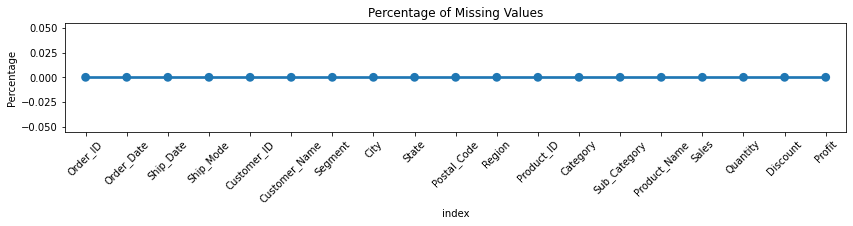

In [304]:
df_null = pd.DataFrame(df.isnull().sum()*100/df.shape[0]).reset_index()
plt.figure(figsize=(14,2))
sns.pointplot(x='index',y=0,data=df_null)
plt.xticks(rotation=45,fontsize=10)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

### Exploratory data Analysis

### Univariate Analysis

In [305]:
col_name = ['Order_ID','Ship_Mode','Customer_Name','Segment', 'City', 'State', 'Postal_Code', 'Region','Product_ID', 
            'Category','Sub_Category','Product_Name']
bar_color = ['rocket','mako','bone','crest','magma','viridis','rocket_r','cubehelix','coolwarm','Blues','vlag','Spectral']

In [306]:
def uni_plot(data,columns):
    for coloumnname,barcolor in zip(col_name,bar_color):
        plt.figure(figsize=(15,8))
        axes = sns.countplot(x = df[coloumnname],order=df[coloumnname].value_counts().head(20).index[0:],palette=barcolor)
        axes.bar_label(axes.containers[0])
        plt.xticks(rotation=45,fontsize=10)
        plt.title(coloumnname,fontsize=20,pad=20)
        plt.tight_layout()
        plt.show()   

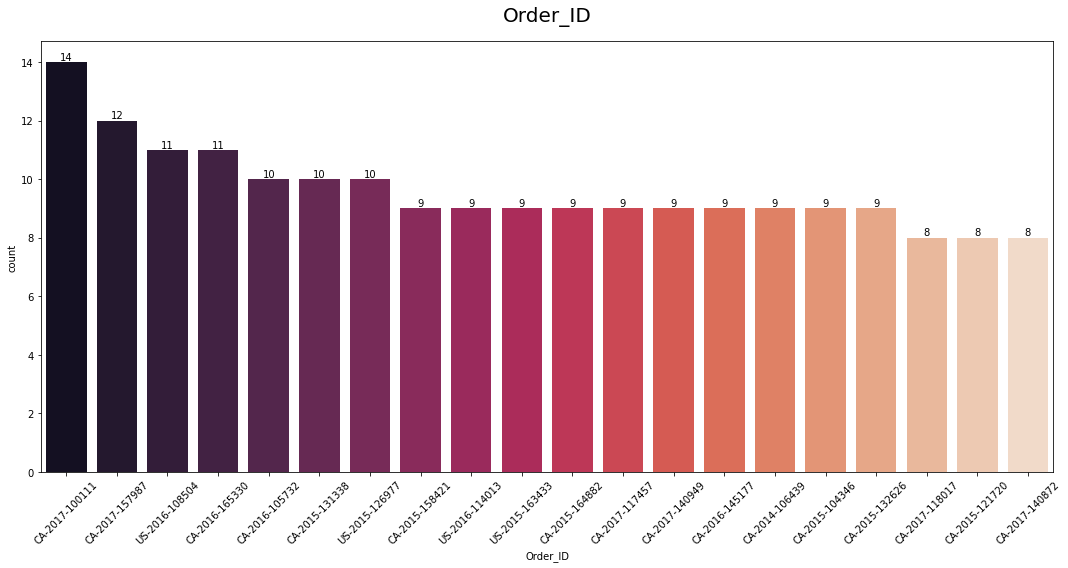

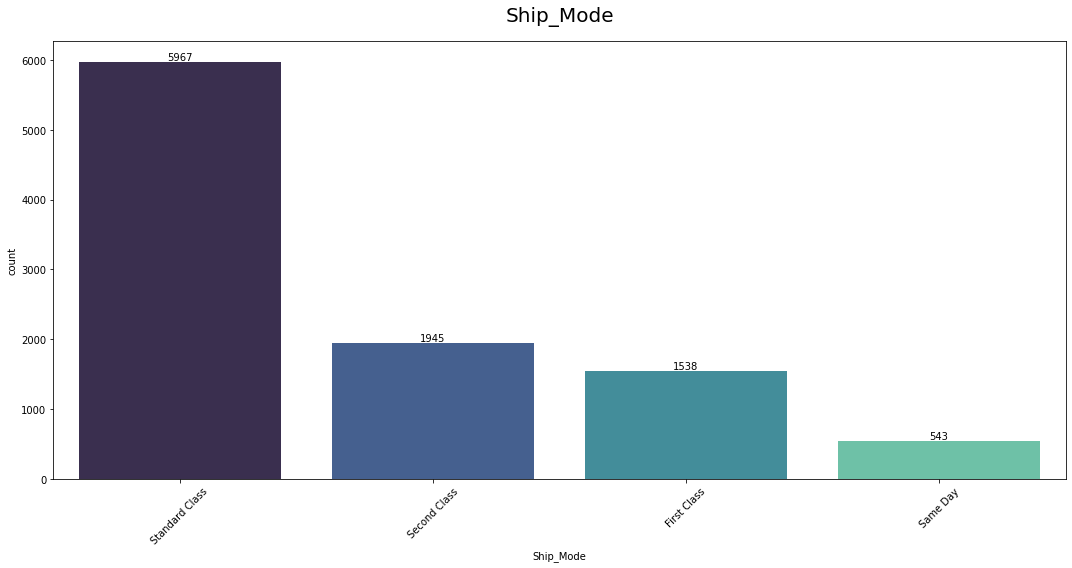

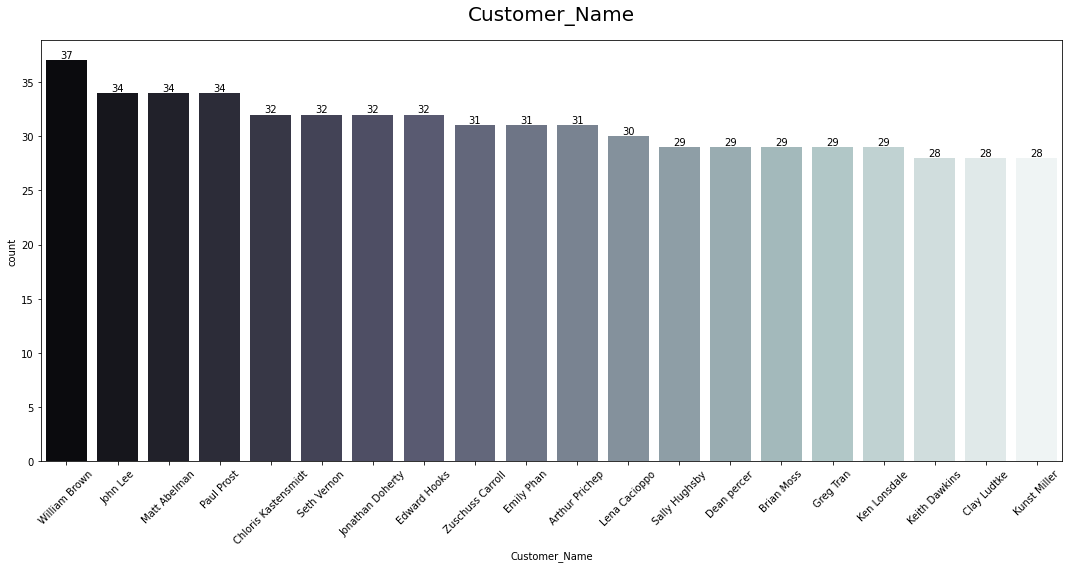

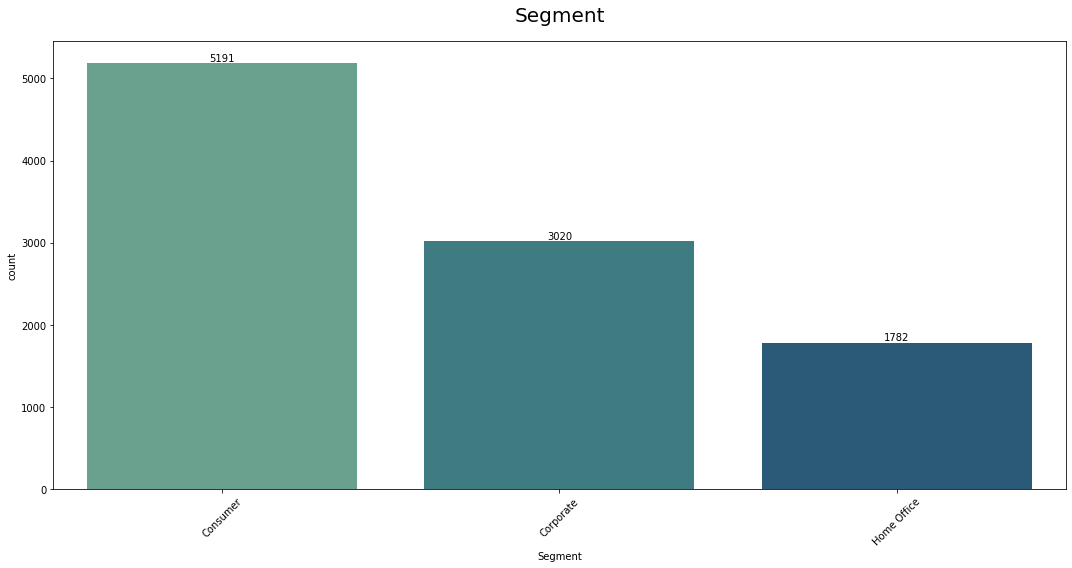

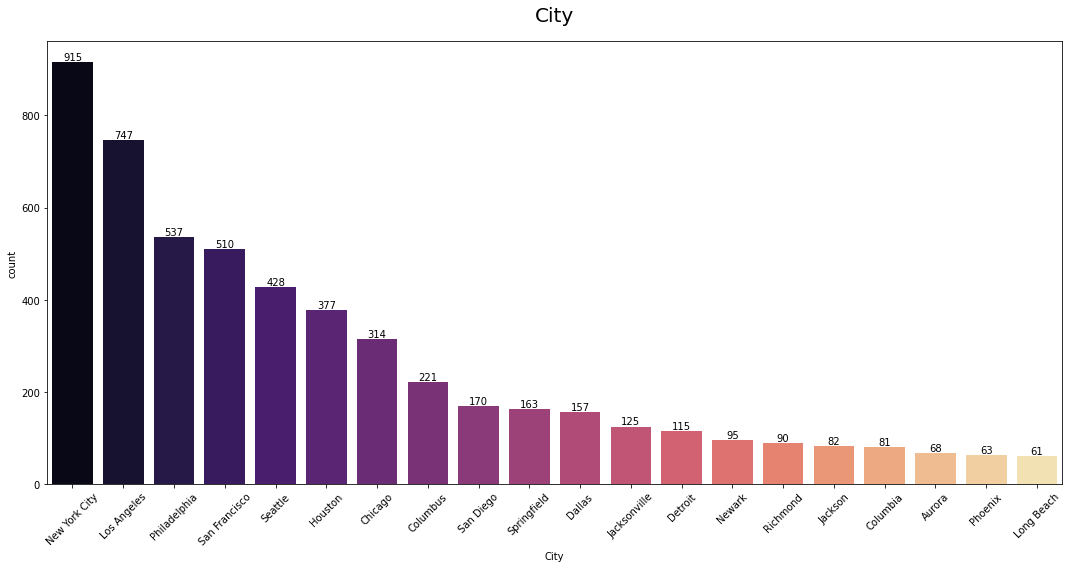

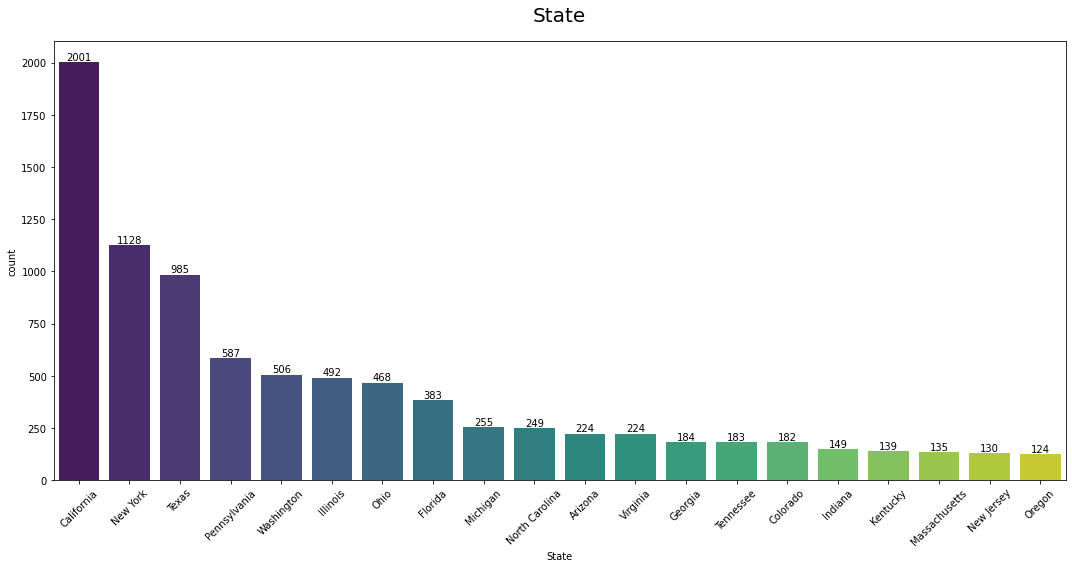

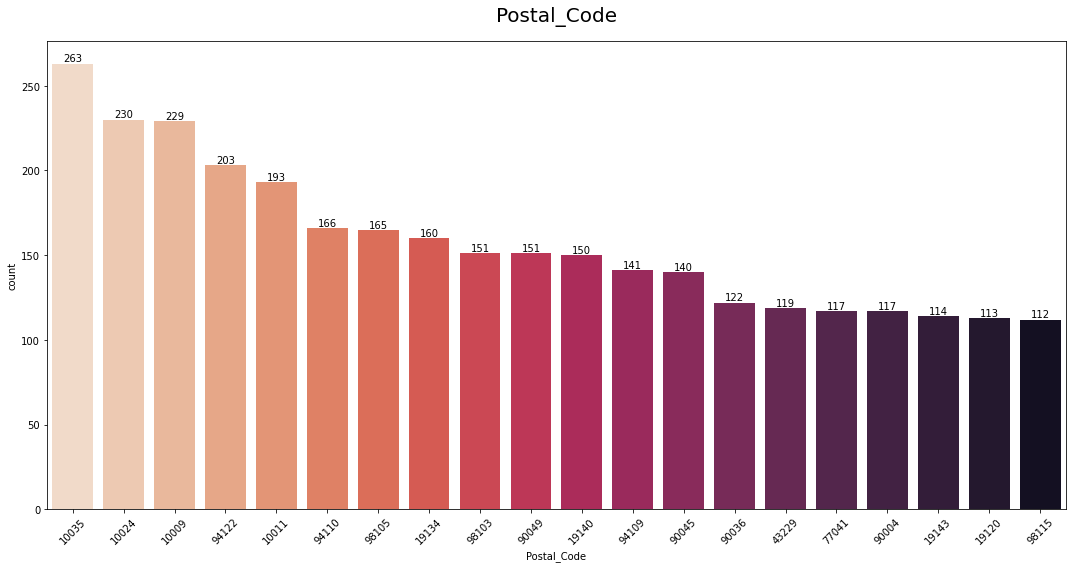

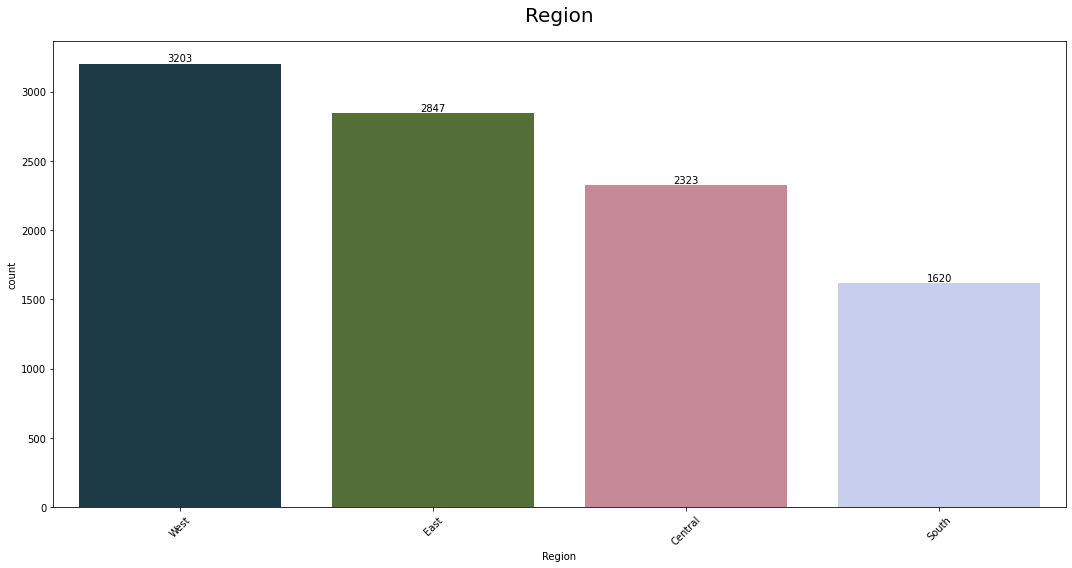

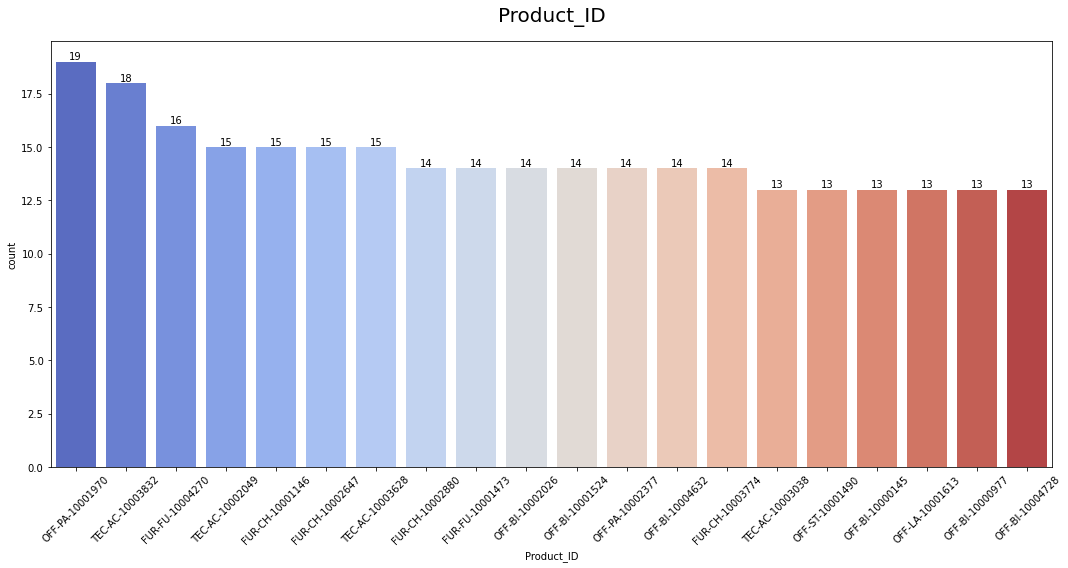

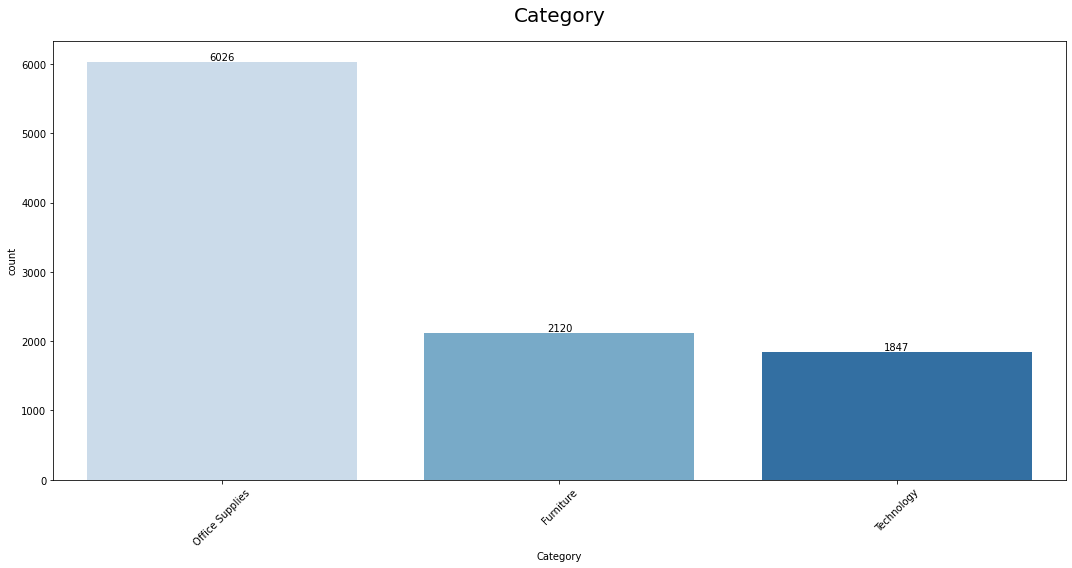

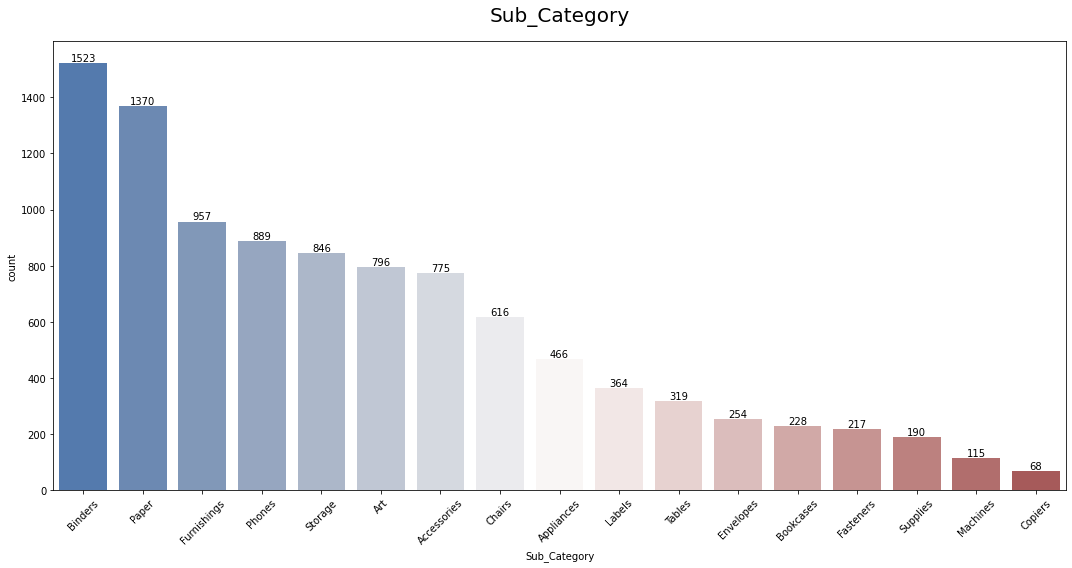

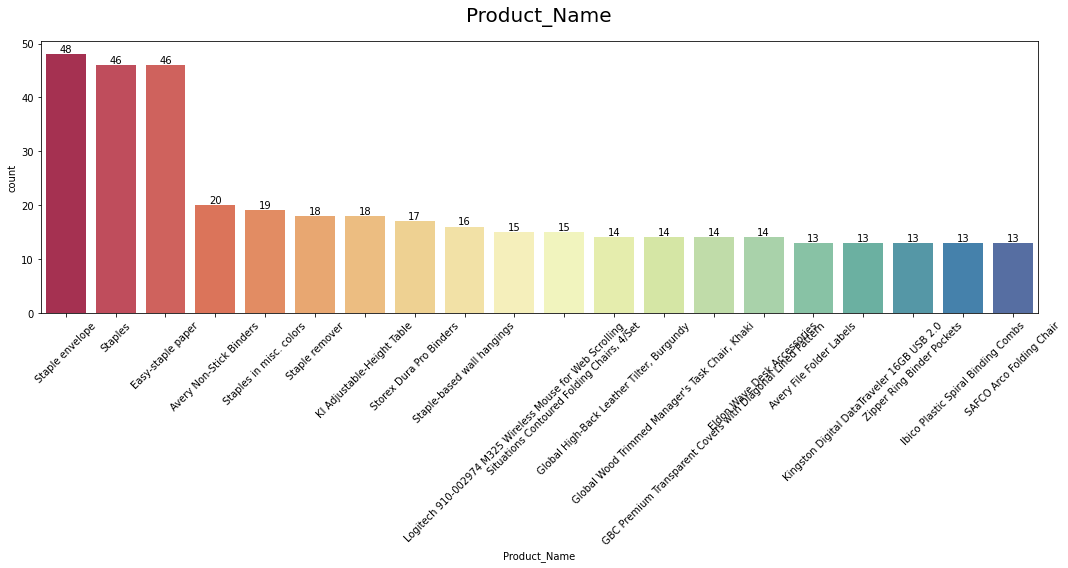

In [307]:
uni_plot(df,col_name)

### Top 5 in each col_name by frequency

In [308]:
df.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'City', 'State', 'Postal_Code', 'Region',
       'Product_ID', 'Category', 'Sub_Category', 'Product_Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [309]:
col_name = ['Order_ID','Ship_Mode','Customer_Name','Segment', 'City', 'State', 'Postal_Code', 'Region','Product_ID', 
            'Category','Sub_Category','Product_Name']

In [310]:
for c in df.columns: display(df[c].value_counts().head().to_frame())

Order_ID
CA-2017-100111        14
CA-2017-157987        12
US-2016-108504        11
CA-2016-165330        11
CA-2016-105732        10

Order_Date
2016-09-05          38
2017-09-02          36
2016-11-10          35
2017-12-01          34
2017-12-02          34

Ship_Date
2015-12-16         35
2017-09-26         34
2017-12-06         32
2017-11-21         32
2017-09-06         30

Ship_Mode
Standard Class       5967
Second Class         1945
First Class          1538
Same Day              543

Customer_ID
WB-21850           37
JL-15835           34
MA-17560           34
PP-18955           34
CK-12205           32

Customer_Name
William Brown                   37
John Lee                        34
Matt Abelman                    34
Paul Prost                      34
Chloris Kastensmidt             32

Segment
Consumer        5191
Corporate       3020
Home Office     1782

City
New York City   915
Los Angeles     747
Philadelphia    537
San Francisco   510
Seattle         428

State
California     2001
New York       1128
Texas           985
Pennsylvania    587
Washington      506

Postal_Code
10035          263
10024          230
10009          229
94122          203
10011          193

Region
West       3203
East       2847
Central    2323
South      1620

Product_ID
OFF-PA-10001970          19
TEC-AC-10003832          18
FUR-FU-10004270          16
TEC-AC-10002049          15
FUR-CH-10001146          15

Category
Office Supplies      6026
Furniture            2120
Technology           1847

Sub_Category
Binders              1523
Paper                1370
Furnishings           957
Phones                889
Storage               846

Product_Name
Staple envelope                    48
Staples                            46
Easy-staple paper                  46
Avery Non-Stick Binders            20
Staples in misc. colors            19

Sales
12.960     56
15.552     39
19.440     39
10.368     36
32.400     28

Quantity
3      2409
2      2401
5      1230
4      1191
1       899

Discount
0.0      4798
0.2      3657
0.7       418
0.8       300
0.3       226

Profit
0.0000      65
6.2208      43
9.3312      38
5.4432      32
3.6288      32

### Bivariate Analysis

#### Ship Mode

In [311]:
Ship_mode_analysis = pd.DataFrame(round(df.groupby('Ship_Mode')['Sales','Profit'].sum(),2)).reset_index()

In [312]:
Ship_mode_analysis['Profit_Percent'] = round((Ship_mode_analysis.Profit/Ship_mode_analysis.Sales)*100,2)

In [313]:
Ship_mode_analysis.head()

Ship_Mode       Sales     Profit  Profit_Percent
0     First Class   351428.42   48969.84           13.93
1        Same Day   128363.12   15891.76           12.38
2    Second Class   459193.57   57446.64           12.51
3  Standard Class  1357934.37  164100.85           12.08

In [314]:
SMA = pd.melt(Ship_mode_analysis,id_vars=['Ship_Mode'],value_vars=['Sales','Profit'])

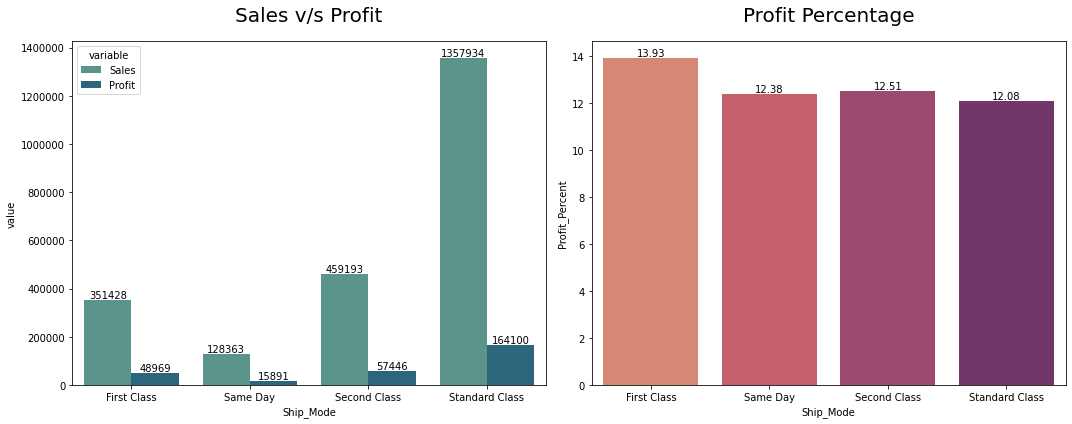

In [315]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
ax1 = sns.barplot(x='Ship_Mode',y='value',hue='variable',data=SMA,palette='crest',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container,fmt='%d')
    ax1.set_title("Sales v/s Profit",fontsize=20,pad=20)

ax1.ticklabel_format(style='plain',axis='y')

ax2 = sns.barplot(x='Ship_Mode',y='Profit_Percent',data=Ship_mode_analysis,ax=ax[1],palette='flare')
ax2.bar_label(ax2.containers[0])
ax2.set_title("Profit Percentage",fontsize=20,pad=20)
plt.tight_layout()

In [316]:
df.head()

Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer_Name    Segment             City       State  Postal_Code  \
0      Claire Gute   Consumer        Henderson    Kentucky        42420   
1      Claire Gute   Consumer        Henderson    Kentucky        42420   
2  Darrin Van Huff  Corporate      Los Angeles  California        90036   
3   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311   
4   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311   

  Region       Product_ID         Category Sub_Category  \
0  South  FUR-BO-10001798        Furniture    Bookcases   
1  South  FUR-CH-10000454        Furniture       Chairs   
2   West  OFF-LA-10000240  Office Supplies       Labels   
3  South  FUR-TA-10000577        Furniture       Tables   
4  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product_Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [317]:
df.nunique()

Order_ID         5009
Order_Date       1237
Ship_Date        1334
Ship_Mode           4
Customer_ID       793
Customer_Name     793
Segment             3
City              531
State              49
Postal_Code       631
Region              4
Product_ID       1862
Category            3
Sub_Category       17
Product_Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

#### Sales and Profit for Top ten Customers

In [318]:
Cust_Analysis = pd.DataFrame(df.groupby('Customer_Name')['Profit','Sales','Quantity'].sum()).reset_index()

In [319]:
Cust_Analysis.head()

Customer_Name     Profit     Sales  Quantity
0    Aaron Bergman   129.3465   886.156        13
1    Aaron Hawkins   365.2152  1744.700        54
2   Aaron Smayling  -253.5746  3050.692        48
3  Adam Bellavance  2054.5885  7755.620        56
4        Adam Hart   281.1890  3250.337        75

In [320]:
#CAA_sales = pd.melt(Cust_Analysis,id_vars=['Customer_Name'],value_vars=['Sales'])

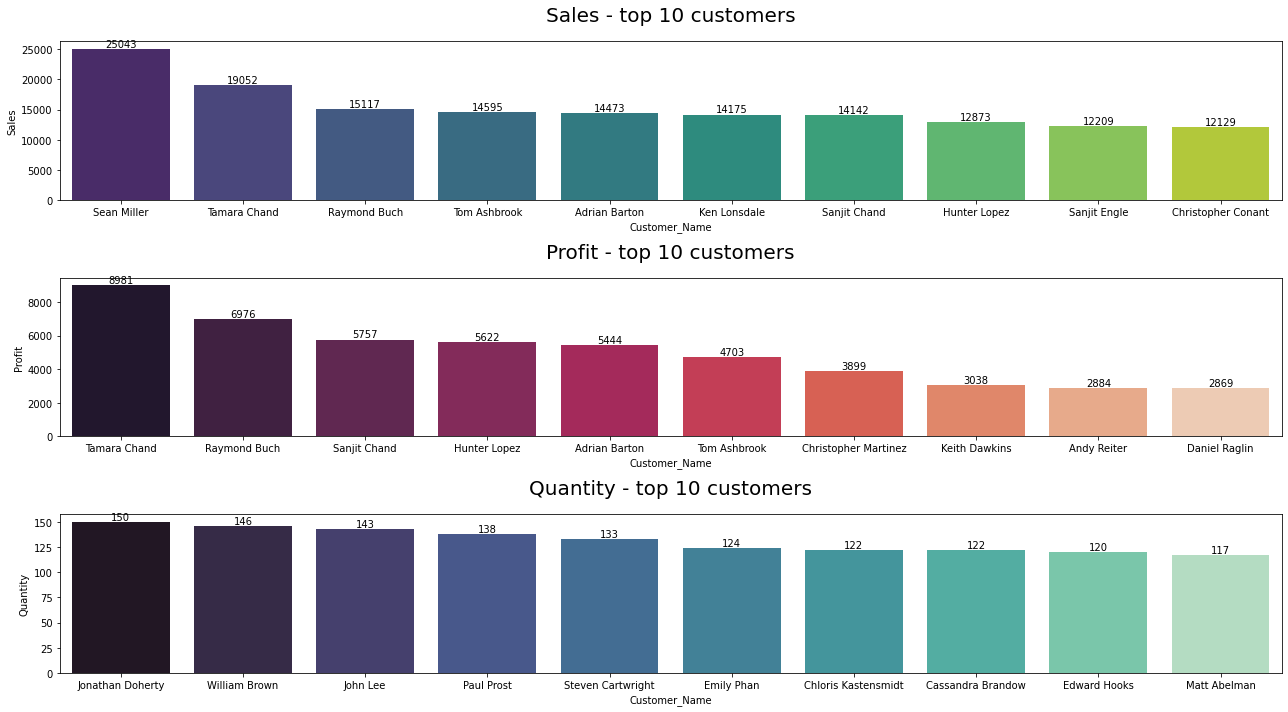

In [321]:
fig,ax=plt.subplots(3,1,figsize=(18,10))

ax3 = sns.barplot(x='Customer_Name',y='Sales',data=Cust_Analysis,
                  order=Cust_Analysis.sort_values('Sales',ascending=False).head(10).Customer_Name,palette='viridis',ax=ax[0])
for container in ax3.containers:
    ax3.bar_label(container,fmt='%d')
   # ax3.set_xticks(rotation=45,fontsize=10)
    ax3.set_title("Sales - top 10 customers",fontsize=20,pad=20)
    

ax3.ticklabel_format(style='plain',axis='y')

ax4 = sns.barplot(x='Customer_Name',y='Profit',data=Cust_Analysis,
                  order=Cust_Analysis.sort_values('Profit',ascending=False).head(10).Customer_Name, palette='rocket',ax=ax[1])
for container in ax4.containers:
    ax4.bar_label(container,fmt='%d')
    #ax4.set_xticks(rotation=45,fontsize=10)
    ax4.set_title("Profit - top 10 customers",fontsize=20,pad=20)


ax4.ticklabel_format(style='plain',axis='y')


ax5 = sns.barplot(x='Customer_Name',y='Quantity',data=Cust_Analysis,
                  order=Cust_Analysis.sort_values('Quantity',ascending=False).head(10).Customer_Name, palette='mako',ax=ax[2])
for container in ax5.containers:
    ax5.bar_label(container,fmt='%d')
    #ax4.set_xticks(rotation=45,fontsize=10)
    ax5.set_title("Quantity - top 10 customers",fontsize=20,pad=20)

#plt.subplots_adjust(wspace=5,hspace=5)
plt.tight_layout()
plt.show()

### Sales and Profit for Segments

In [322]:
Seg_analysis = pd.DataFrame(df.groupby('Segment')['Sales','Profit','Quantity'].sum()).reset_index()

In [323]:
Seg_melt = pd.melt(Seg_analysis,id_vars=['Segment'],value_vars=['Sales','Profit'])

In [324]:
Seg_analysis

Segment         Sales       Profit  Quantity
0     Consumer  1.161401e+06  134119.2092     19521
1    Corporate  7.061464e+05   91979.1340     11608
2  Home Office  4.293718e+05   60310.7373      6742

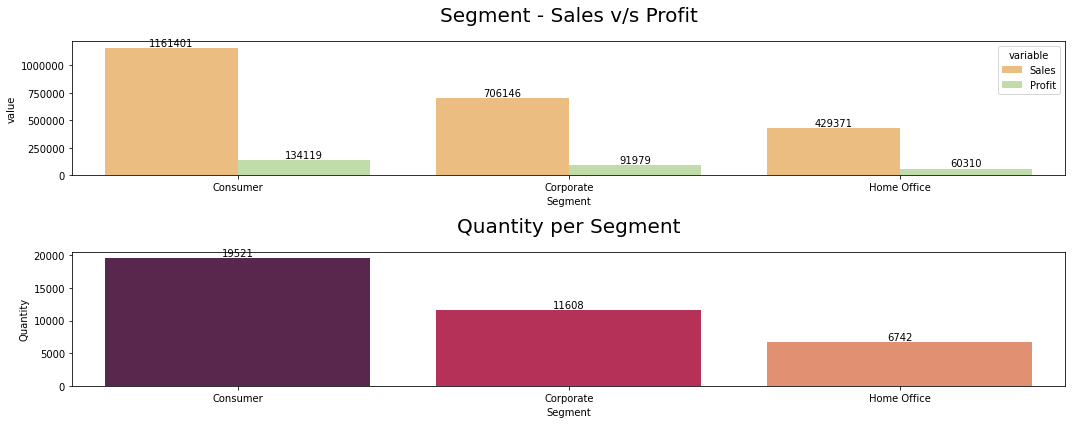

In [325]:
fig,ax = plt.subplots(2,1,figsize=(15,6))
ax1 = sns.barplot(x='Segment',y='value',hue='variable',data=Seg_melt,palette='Spectral',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container,fmt='%d')
    ax1.set_title("Segment - Sales v/s Profit",fontsize=20,pad=20)

ax1.ticklabel_format(style='plain',axis='y')

ax2 = sns.barplot(x='Segment',y='Quantity',data=Seg_analysis,
                  order=Seg_analysis.sort_values('Profit',ascending=False).head(10).Segment, palette='rocket',ax=ax[1])
for container in ax2.containers:
    ax2.bar_label(container,fmt='%d')
    ax2.set_title("Quantity per Segment",fontsize=20,pad=20)

plt.tight_layout()
plt.show()

### Sales and Profit for City

In [326]:
City_Analysis = pd.DataFrame(df.groupby('City')['Profit','Sales'].sum()).reset_index()

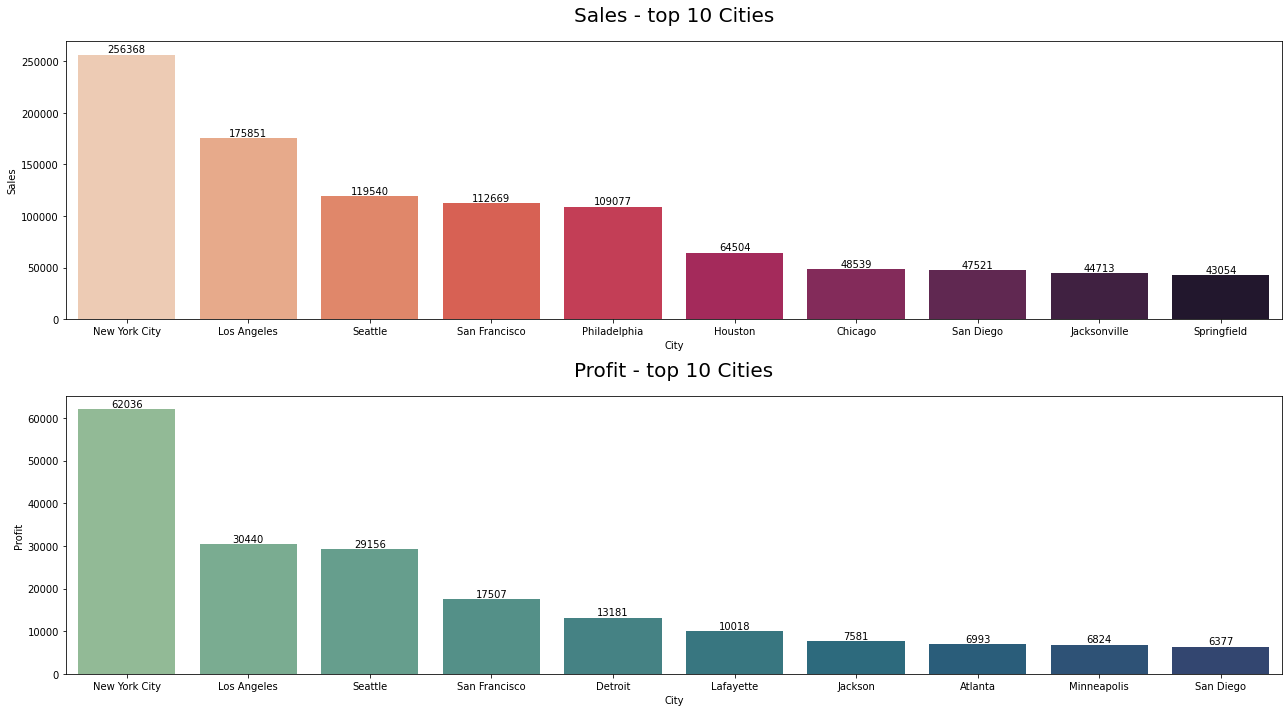

In [327]:
fig,ax=plt.subplots(2,1,figsize=(18,10))

ax3 = sns.barplot(x='City',y='Sales',data=City_Analysis,
                  order=City_Analysis.sort_values('Sales',ascending=False).head(10).City,palette='rocket_r',ax=ax[0])
for container in ax3.containers:
    ax3.bar_label(container,fmt='%d')
   # ax3.set_xticks(rotation=45,fontsize=10)
    ax3.set_title("Sales - top 10 Cities",fontsize=20,pad=20)
    

ax3.ticklabel_format(style='plain',axis='y')

ax4 = sns.barplot(x='City',y='Profit',data=City_Analysis,
                  order=City_Analysis.sort_values('Profit',ascending=False).head(10).City, palette='crest',ax=ax[1])
for container in ax4.containers:
    ax4.bar_label(container,fmt='%d')
    #ax4.set_xticks(rotation=45,fontsize=10)
    ax4.set_title("Profit - top 10 Cities",fontsize=20,pad=20)


ax4.ticklabel_format(style='plain',axis='y')

#plt.subplots_adjust(wspace=5,hspace=5)
plt.tight_layout()
plt.show()

### Sales and Profit for State

In [328]:
State_Analysis = pd.DataFrame(df.groupby('State')['Profit','Sales'].sum()).reset_index()

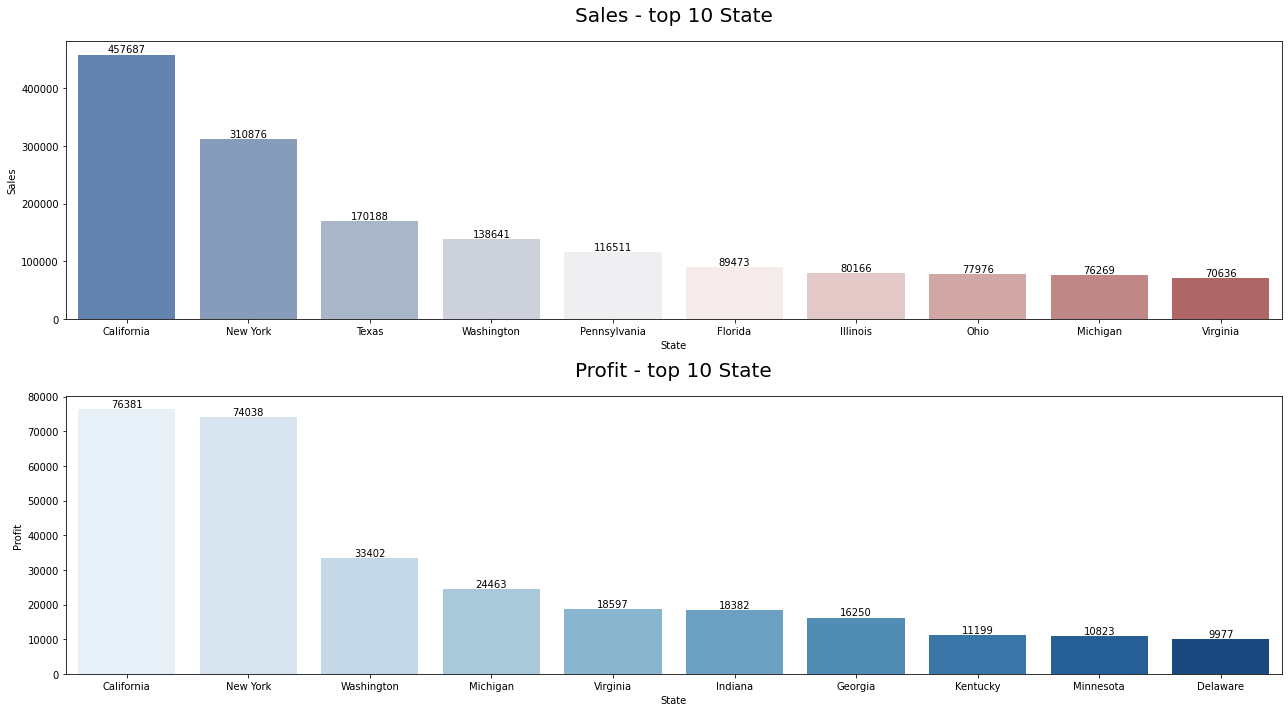

In [329]:
fig,ax=plt.subplots(2,1,figsize=(18,10))

ax3 = sns.barplot(x='State',y='Sales',data=State_Analysis,
                  order=State_Analysis.sort_values('Sales',ascending=False).head(10).State,palette='vlag',ax=ax[0])
for container in ax3.containers:
    ax3.bar_label(container,fmt='%d')
   # ax3.set_xticks(rotation=45,fontsize=10)
    ax3.set_title("Sales - top 10 State",fontsize=20,pad=20)
    

ax3.ticklabel_format(style='plain',axis='y')

ax4 = sns.barplot(x='State',y='Profit',data=State_Analysis,
                  order=State_Analysis.sort_values('Profit',ascending=False).head(10).State, palette='Blues',ax=ax[1])
for container in ax4.containers:
    ax4.bar_label(container,fmt='%d')
    #ax4.set_xticks(rotation=45,fontsize=10)
    ax4.set_title("Profit - top 10 State",fontsize=20,pad=20)


ax4.ticklabel_format(style='plain',axis='y')

#plt.subplots_adjust(wspace=5,hspace=5)
plt.tight_layout()
plt.show()

### Sales and Profit by Region

In [330]:
Region_analysis = pd.DataFrame(round(df.groupby('Region')['Sales','Profit'].sum(),2)).reset_index()

In [331]:
Region_analysis['Profit_Percent'] = round((Region_analysis.Profit/Region_analysis.Sales)*100,2)

In [332]:
Region_analysis

Region      Sales     Profit  Profit_Percent
0  Central  501239.89   39706.36            7.92
1     East  678499.87   91534.84           13.49
2    South  391721.90   46749.43           11.93
3     West  725457.82  108418.45           14.94

In [333]:
RMA = pd.melt(Region_analysis,id_vars=['Region'],value_vars=['Sales','Profit'])

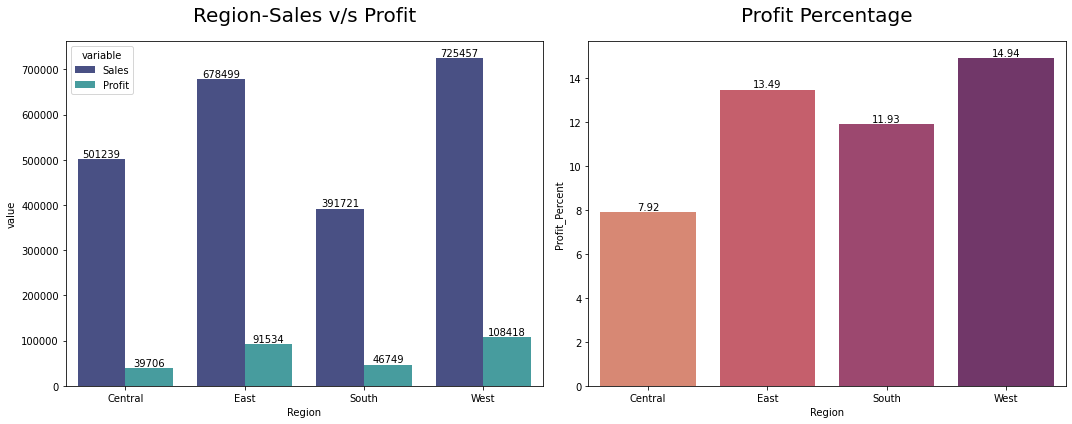

In [334]:
fig,ax = plt.subplots(1,2,figsize=(15,6))

ax1 = sns.barplot(x='Region',y='value',hue='variable',data=RMA,palette='mako',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container,fmt='%d')
    ax1.set_title('Region-Sales v/s Profit',fontsize=20,pad=20)
    
ax1.ticklabel_format(style='plain',axis='y')

ax2 = sns.barplot(x='Region',y='Profit_Percent',data=Region_analysis,ax=ax[1],palette='flare')
ax2.bar_label(ax2.containers[0])
ax2.set_title("Profit Percentage",fontsize=20,pad=20)
plt.tight_layout()

### Sales and Profit by Category

In [335]:
Category_analysis = pd.DataFrame(round(df.groupby('Category')['Sales','Profit'].sum(),2)).reset_index()

In [336]:
Category_analysis['Profit_Percent'] = round((Category_analysis.Profit/Category_analysis.Sales)*100,2)

In [337]:
Category_analysis

Category      Sales     Profit  Profit_Percent
0        Furniture  741718.42   18463.33            2.49
1  Office Supplies  719047.03  122490.80           17.04
2       Technology  836154.03  145454.95           17.40

In [338]:
CMA = pd.melt(Category_analysis,id_vars=['Category'],value_vars=['Sales','Profit'])

In [339]:
CMA

Category variable      value
0        Furniture    Sales  741718.42
1  Office Supplies    Sales  719047.03
2       Technology    Sales  836154.03
3        Furniture   Profit   18463.33
4  Office Supplies   Profit  122490.80
5       Technology   Profit  145454.95

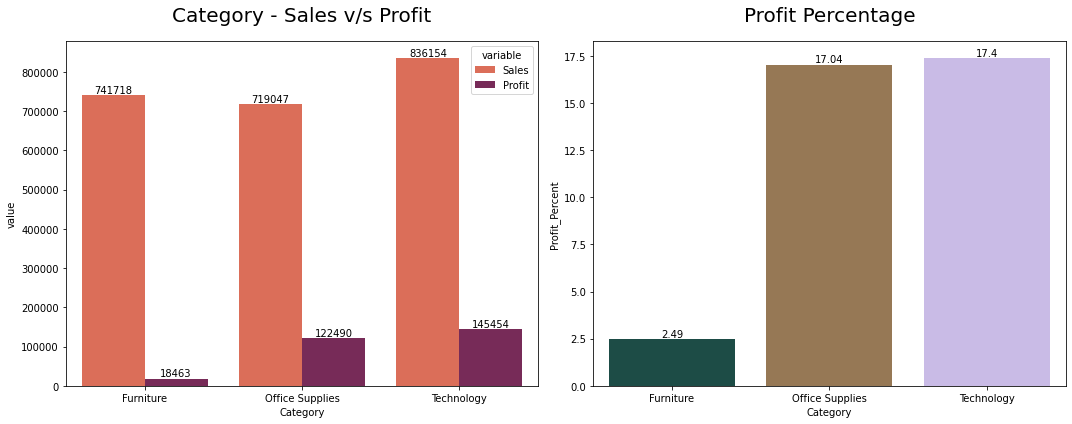

In [340]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
ax1 = sns.barplot(x='Category',y='value',hue='variable',data=CMA,palette='rocket_r',ax=ax[0])
for container in ax1.containers:
    ax1.bar_label(container,fmt='%d')
    ax1.set_title("Category - Sales v/s Profit",fontsize=20,pad=20)

ax1.ticklabel_format(style='plain',axis='y')

ax2 = sns.barplot(x='Category',y='Profit_Percent',data=Category_analysis,ax=ax[1],palette='cubehelix')
ax2.bar_label(ax2.containers[0])
ax2.set_title("Profit Percentage",fontsize=20,pad=20)
plt.tight_layout()

### Sales and Profit by Sub-Category

In [341]:
SubCat_Analysis = pd.DataFrame(df.groupby('Sub_Category')['Profit','Sales','Quantity'].sum()).reset_index()

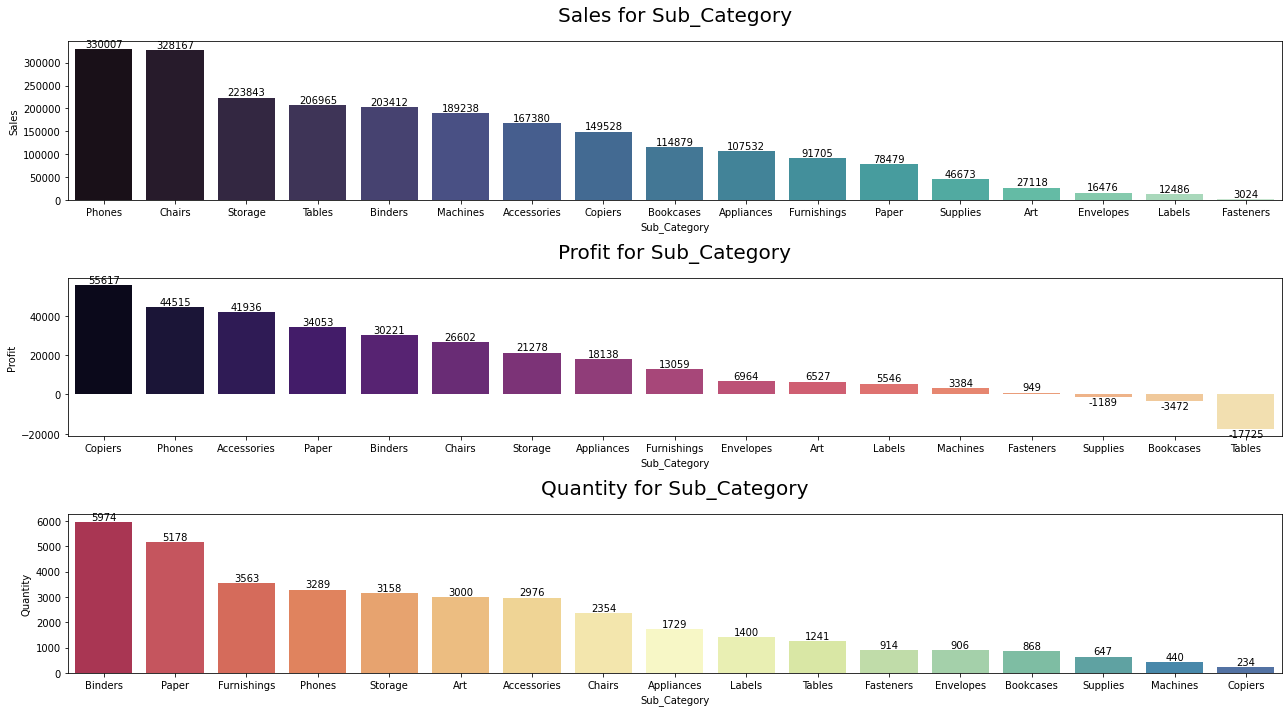

In [342]:
fig,ax=plt.subplots(3,1,figsize=(18,10))

ax3 = sns.barplot(x='Sub_Category',y='Sales',data=SubCat_Analysis,
                  order=SubCat_Analysis.sort_values('Sales',ascending=False).Sub_Category,palette='mako',ax=ax[0])
for container in ax3.containers:
    ax3.bar_label(container,fmt='%d')
   # ax3.set_xticks(rotation=45,fontsize=10)
    ax3.set_title("Sales for Sub_Category",fontsize=20,pad=20)
    

ax3.ticklabel_format(style='plain',axis='y')

ax4 = sns.barplot(x='Sub_Category',y='Profit',data=SubCat_Analysis,
                  order=SubCat_Analysis.sort_values('Profit',ascending=False).Sub_Category,palette='magma',ax=ax[1])
for container in ax4.containers:
    ax4.bar_label(container,fmt='%d')
    #ax4.set_xticks(rotation=45,fontsize=10)
    ax4.set_title("Profit for Sub_Category",fontsize=20,pad=20)

ax4.ticklabel_format(style='plain',axis='y')

ax5 = sns.barplot(x='Sub_Category',y='Quantity',data=SubCat_Analysis,
                  order=SubCat_Analysis.sort_values('Quantity',ascending=False).Sub_Category,palette='Spectral',ax=ax[2])
for container in ax5.containers:
    ax5.bar_label(container,fmt='%d')
   # ax3.set_xticks(rotation=45,fontsize=10)
    ax5.set_title("Quantity for Sub_Category",fontsize=20,pad=20)
    

ax5.ticklabel_format(style='plain',axis='y')

#plt.subplots_adjust(wspace=5,hspace=5)
plt.tight_layout()
plt.show()

In [343]:
df.head()

Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer_Name    Segment             City       State  Postal_Code  \
0      Claire Gute   Consumer        Henderson    Kentucky        42420   
1      Claire Gute   Consumer        Henderson    Kentucky        42420   
2  Darrin Van Huff  Corporate      Los Angeles  California        90036   
3   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311   
4   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311   

  Region       Product_ID         Category Sub_Category  \
0  South  FUR-BO-10001798        Furniture    Bookcases   
1  South  FUR-CH-10000454        Furniture       Chairs   
2   West  OFF-LA-10000240  Office Supplies       Labels   
3  South  FUR-TA-10000577        Furniture       Tables   
4  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product_Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

## Analysis over Months and Year

In [344]:
df['Month'] = pd.DatetimeIndex(df['Order_Date']).month
df['Year'] = pd.DatetimeIndex(df['Order_Date']).year

In [345]:
df.head()

Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer_Name    Segment             City       State  Postal_Code  ...  \
0      Claire Gute   Consumer        Henderson    Kentucky        42420  ...   
1      Claire Gute   Consumer        Henderson    Kentucky        42420  ...   
2  Darrin Van Huff  Corporate      Los Angeles  California        90036  ...   
3   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311  ...   
4   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311  ...   

        Product_ID         Category Sub_Category  \
0  FUR-BO-10001798        Furniture    Bookcases   
1  FUR-CH-10000454        Furniture       Chairs   
2  OFF-LA-10000240  Office Supplies       Labels   
3  FUR-TA-10000577        Furniture       Tables   
4  OFF-ST-10000760  Office Supplies      Storage   

                                        Product_Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  Month  Year  
0      0.00   41.9136     11  2016  
1      0.00  219.5820     11  2016  
2      0.00    6.8714      6  2016  
3      0.45 -383.0310     10  2015  
4      0.20    2.5164     10  2015  

[5 rows x 21 columns]

### Sales per year

In [346]:
Yr_analysis = pd.DataFrame(round(df.groupby('Year')['Sales','Profit'].sum(),2)).reset_index()

In [347]:
Yr_A = pd.melt(Yr_analysis,id_vars='Year',value_vars=['Sales','Profit'])

In [348]:
Yr_A

Year variable      value
0  2014    Sales  483966.13
1  2015    Sales  470532.51
2  2016    Sales  609205.60
3  2017    Sales  733215.26
4  2014   Profit   49556.03
5  2015   Profit   61618.60
6  2016   Profit   81795.17
7  2017   Profit   93439.27

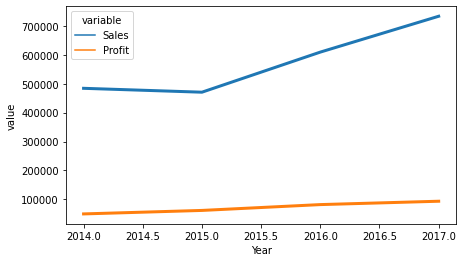

In [349]:
plt.figure(figsize=(7,4))
sns.lineplot(x='Year',y='value',hue='variable',data=Yr_A,lw=3)
plt.show()

In [350]:
### Average Sales by month

MM_analysis = pd.DataFrame(round(df.groupby('Month')['Sales'].mean(),2)).reset_index()

In [351]:
MM_analysis

Month   Sales
0       1  249.15
1       2  199.17
2       3  294.55
3       4  206.12
4       5  210.92
5       6  213.00
6       7  207.38
7       8  225.27
8       9  222.45
9      10  244.59
10     11  239.61
11     12  231.03

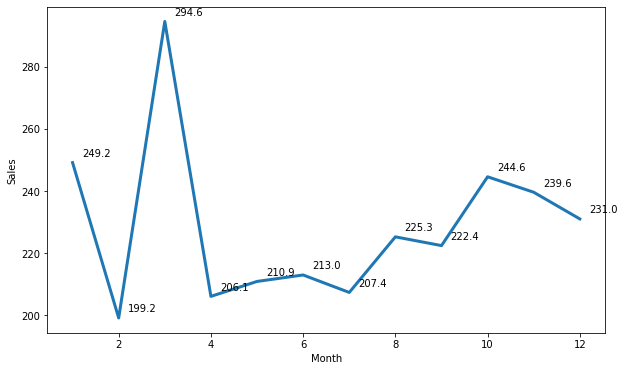

In [352]:
plt.figure(figsize=(10,6))
ax1 = sns.lineplot(x='Month',y='Sales',data=MM_analysis,lw=3,markers=True)

#ax1.set(ylim=(0,300))

## label points on the plot
for x,y in zip(MM_analysis.Month,MM_analysis.Sales):
    plt.text(x=x+0.2,y=y+2,s='{:.1f}'.format(y))

plt.show()

In [353]:
### Creating a new column "Year_Month"

df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

In [354]:
df['Year_Month'] = pd.to_datetime(df['Year_Month']).dt.date

In [355]:
# Make Year_Month as index
#df.set_index(pd.DatetimeIndex(df['Year_Month']),inplace=True)

In [356]:
df.head()

Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer_Name    Segment             City       State  Postal_Code  ...  \
0      Claire Gute   Consumer        Henderson    Kentucky        42420  ...   
1      Claire Gute   Consumer        Henderson    Kentucky        42420  ...   
2  Darrin Van Huff  Corporate      Los Angeles  California        90036  ...   
3   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311  ...   
4   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311  ...   

          Category Sub_Category  \
0        Furniture    Bookcases   
1        Furniture       Chairs   
2  Office Supplies       Labels   
3        Furniture       Tables   
4  Office Supplies      Storage   

                                        Product_Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

   Discount    Profit  Month  Year  Year_Month  
0      0.00   41.9136     11  2016  2016-11-01  
1      0.00  219.5820     11  2016  2016-11-01  
2      0.00    6.8714      6  2016  2016-06-01  
3      0.45 -383.0310     10  2015  2015-10-01  
4      0.20    2.5164     10  2015  2015-10-01  

[5 rows x 22 columns]

### Sales Trend for Year_Month

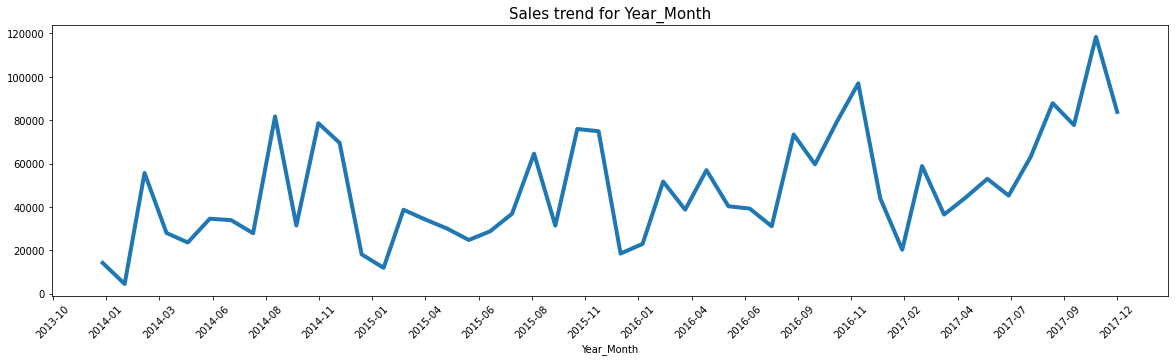

In [357]:
plt.figure(figsize=(20,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))

df.groupby('Year_Month')['Sales'].sum().plot(linewidth=4)
plt.title('Sales trend for Year_Month',fontsize=15)
plt.xticks(rotation = 45)
#ax = sns.lineplot(x='Year_Month',y='Sales',data=df,ci=False)
plt.show()

### Sales trend for Categories

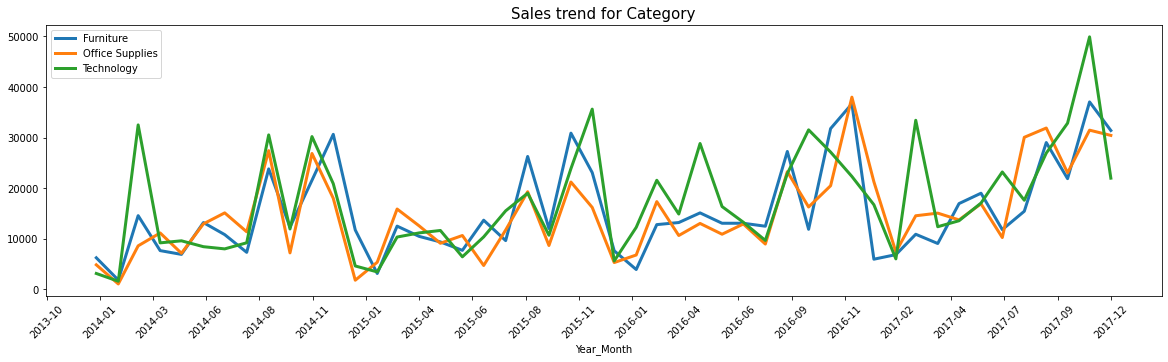

In [358]:
plt.figure(figsize=(20,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))

df[df['Category'] == 'Furniture'].groupby('Year_Month')['Sales'].sum().plot(linewidth=3,label='Furniture')
df[df['Category'] == 'Office Supplies'].groupby('Year_Month')['Sales'].sum().plot(linewidth=3,label='Office Supplies')
df[df['Category'] == 'Technology'].groupby('Year_Month')['Sales'].sum().plot(linewidth=3,label='Technology')

plt.title('Sales trend for Category',fontsize=15)
plt.legend()
plt.xticks(rotation = 45)
plt.show()

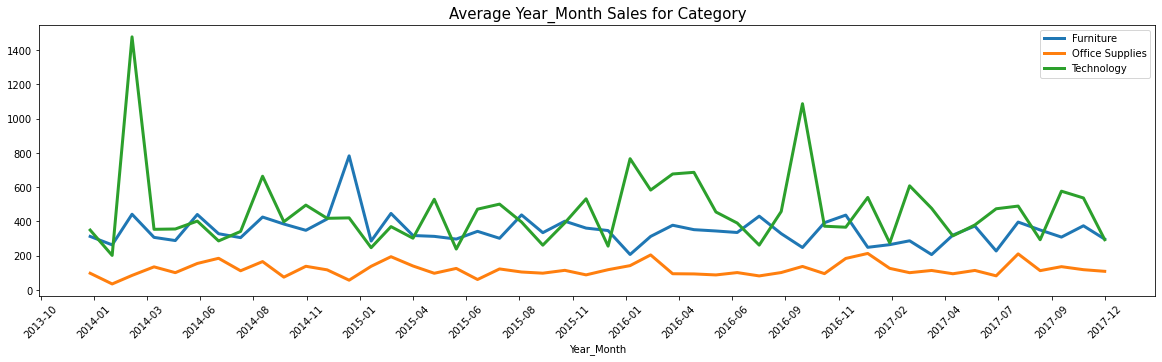

In [359]:
plt.figure(figsize=(20,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=75))

df[df['Category'] == 'Furniture'].groupby('Year_Month')['Sales'].mean().plot(linewidth=3,label='Furniture')
df[df['Category'] == 'Office Supplies'].groupby('Year_Month')['Sales'].mean().plot(linewidth=3,label='Office Supplies')
df[df['Category'] == 'Technology'].groupby('Year_Month')['Sales'].mean().plot(linewidth=3,label='Technology')

plt.title('Average Year_Month Sales for Category',fontsize=15)
plt.legend()
plt.xticks(rotation = 45)
plt.show()

- ### Category - Ship_Mode v/s Sales

In [360]:
df.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'City', 'State', 'Postal_Code', 'Region',
       'Product_ID', 'Category', 'Sub_Category', 'Product_Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Month', 'Year', 'Year_Month'],
      dtype='object')

In [361]:
Cat_SM = pd.DataFrame(df.groupby(['Category','Ship_Mode'])['Sales'].agg(['size','sum'])).reset_index()

In [362]:
Cat_SM 

Category       Ship_Mode  size          sum
0         Furniture     First Class   327  110730.5229
1         Furniture        Same Day   119   39148.7790
2         Furniture    Second Class   427  156289.0244
3         Furniture  Standard Class  1247  435550.0970
4   Office Supplies     First Class   910  101332.3090
5   Office Supplies        Same Day   326   29090.4810
6   Office Supplies    Second Class  1152  160683.0030
7   Office Supplies  Standard Class  3638  427941.2390
8        Technology     First Class   301  139365.5910
9        Technology        Same Day    98   60123.8650
10       Technology    Second Class   366  142221.5420
11       Technology  Standard Class  1082  494443.0350

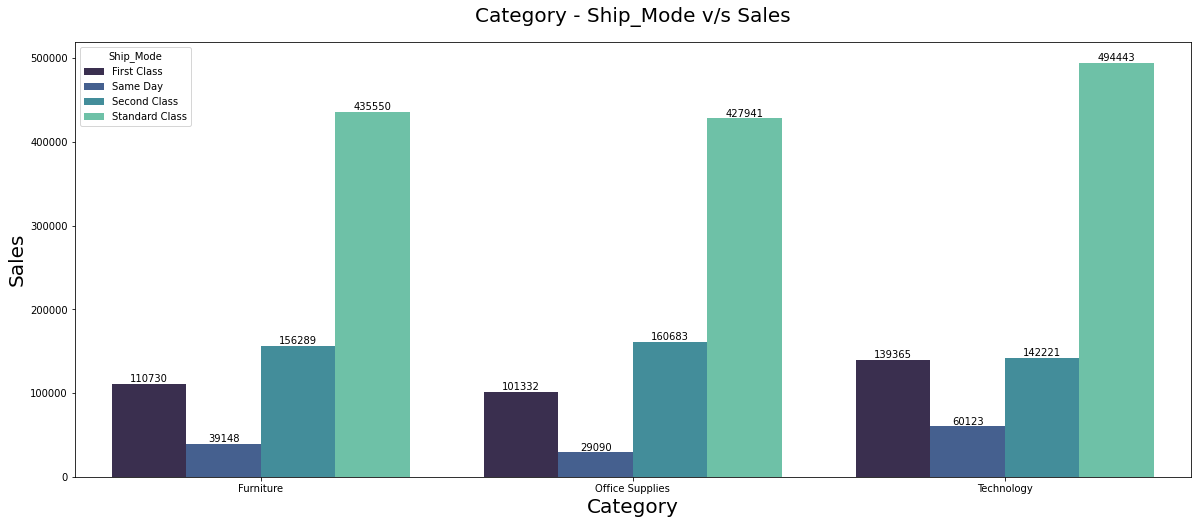

In [363]:
plt.figure(figsize=(20,8))

ax1 = sns.barplot(x='Category',y='sum',hue='Ship_Mode',data=Cat_SM,ci=None,palette='mako')
for container in ax1.containers:
    ax1.bar_label(container,fmt='%d')
    ax1.set_title("Category - Ship_Mode v/s Sales",fontsize=20,pad=20)

plt.xlabel('Category', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.show()

- ### Category - top 5 Customer_Name v/s Sales

In [364]:
Cat_Cust = pd.DataFrame(df.groupby(['Category','Customer_Name'])['Sales'].agg(['size','sum'])).reset_index()

In [365]:
Cat_Cust 

Category       Customer_Name  size       sum
0      Furniture       Aaron Bergman     2   390.672
1      Furniture       Aaron Hawkins     2   365.906
2      Furniture      Aaron Smayling     2   648.954
3      Furniture     Adam Bellavance     3  2614.308
4      Furniture           Adam Hart     6  1635.122
...          ...                 ...   ...       ...
2177  Technology        Xylona Preis     3   245.154
2178  Technology       Yana Sorensen     1   236.000
2179  Technology      Yoseph Carroll     2  1529.560
2180  Technology    Zuschuss Carroll     6  2306.372
2181  Technology  Zuschuss Donatelli     3  1297.400

[2182 rows x 4 columns]

In [366]:
cust_five = Cat_Cust.groupby('Category').apply(lambda x : x.nlargest(5,'sum')).reset_index(drop=True)

In [367]:
cust_five

Category         Customer_Name  size        sum
0         Furniture           Seth Vernon    15   8332.090
1         Furniture            Joe Elijah     7   6920.136
2         Furniture          Peter Fuller     5   6837.348
3         Furniture       Caroline Jumper     9   6267.194
4         Furniture             Greg Tran     4   6219.260
5   Office Supplies          Sanjit Chand    13  12081.258
6   Office Supplies         Adrian Barton    11  11489.256
7   Office Supplies          Ken Lonsdale    15   9654.950
8   Office Supplies  Christopher Martinez     8   8725.172
9   Office Supplies          Edward Hooks    26   8667.576
10       Technology           Sean Miller     3  23481.508
11       Technology          Tamara Chand     2  17997.950
12       Technology          Raymond Buch     4  14265.416
13       Technology          Tom Ashbrook     4  13709.958
14       Technology          Hunter Lopez     3  11640.810

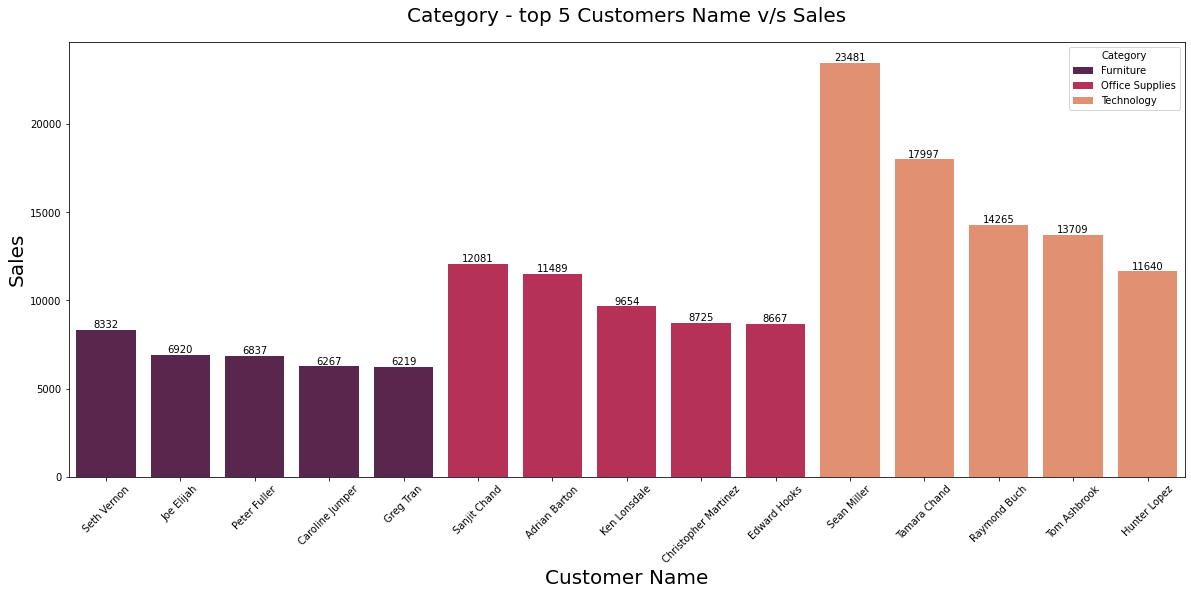

In [368]:
plt.figure(figsize=(20,8))

ax1 = sns.barplot(x='Customer_Name',y='sum',hue='Category',data=cust_five,ci=None,palette='rocket',dodge=False)
for container in ax1.containers:
    ax1.bar_label(container,fmt='%d')
    ax1.set_title("Category - top 5 Customers Name v/s Sales",fontsize=20,pad=20)
plt.xticks(rotation = 45)
plt.xlabel('Customer Name', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.show()

- ### Category - Segment v/s Sales

In [369]:
df.Segment.nunique()

3

In [370]:
Cat_Seg = pd.DataFrame(df.groupby(['Category','Segment'])['Sales'].agg(['size','sum'])).reset_index()

In [371]:
Cat_Seg

Category      Segment  size          sum
0        Furniture     Consumer  1113  391049.3120
1        Furniture    Corporate   646  229019.7858
2        Furniture  Home Office   361  121649.3255
3  Office Supplies     Consumer  3127  363952.1360
4  Office Supplies    Corporate  1820  230676.4620
5  Office Supplies  Home Office  1079  124418.4340
6       Technology     Consumer   951  406399.8970
7       Technology    Corporate   554  246450.1190
8       Technology  Home Office   342  183304.0170

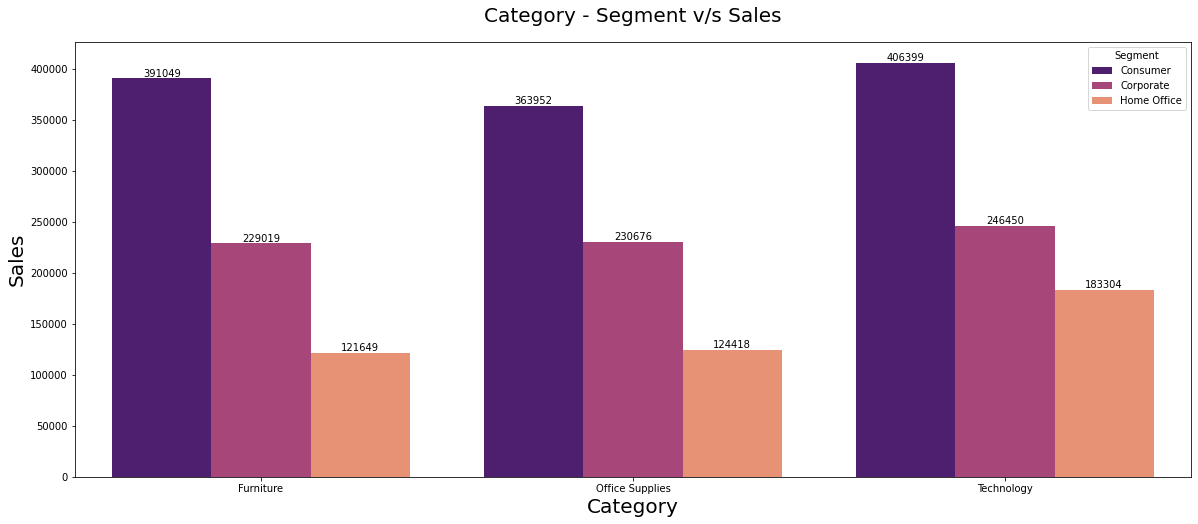

In [372]:
plt.figure(figsize=(20,8))

ax1 = sns.barplot(x='Category',y='sum',hue='Segment',data=Cat_Seg,ci=None,palette='magma')
for container in ax1.containers:
    ax1.bar_label(container,fmt='%d')
    ax1.set_title("Category - Segment v/s Sales",fontsize=20,pad=20)

plt.xlabel('Category', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.show()

- ### Category - Top 5 Cities v/s Sales

In [373]:
Cat_city = df.groupby(['Category','City'])['Sales'].agg(['size','sum']).reset_index()

In [374]:
Cat_city

Category        City  size        sum
0      Furniture       Akron     2   433.5960
1      Furniture  Alexandria     3   267.4600
2      Furniture       Allen     1   244.0060
3      Furniture   Allentown     1    11.6480
4      Furniture    Amarillo     4  3048.5828
...          ...         ...   ...        ...
1193  Technology  Wilmington     5  1786.3760
1194  Technology    Woodland     1   239.9840
1195  Technology   Woodstock     1   272.6100
1196  Technology     Yonkers     5  6140.2200
1197  Technology        Yuma     2   785.5130

[1198 rows x 4 columns]

In [375]:
City_five = Cat_city.groupby('Category').apply(lambda x : x.nlargest(5,'sum')).reset_index(drop=True)

In [376]:
City_five

Category           City  size         sum
0         Furniture  New York City   192   75691.049
1         Furniture    Los Angeles   154   54000.041
2         Furniture        Seattle    97   40995.878
3         Furniture   Philadelphia   111   36495.541
4         Furniture  San Francisco   102   36357.308
5   Office Supplies  New York City   552   71361.006
6   Office Supplies    Los Angeles   443   48821.514
7   Office Supplies  San Francisco   322   42253.152
8   Office Supplies        Seattle   249   36038.492
9   Office Supplies   Philadelphia   312   30658.153
10       Technology  New York City   171  109316.106
11       Technology    Los Angeles   150   73029.786
12       Technology        Seattle    82   42506.372
13       Technology   Philadelphia   114   41923.319
14       Technology  San Francisco    86   34058.632

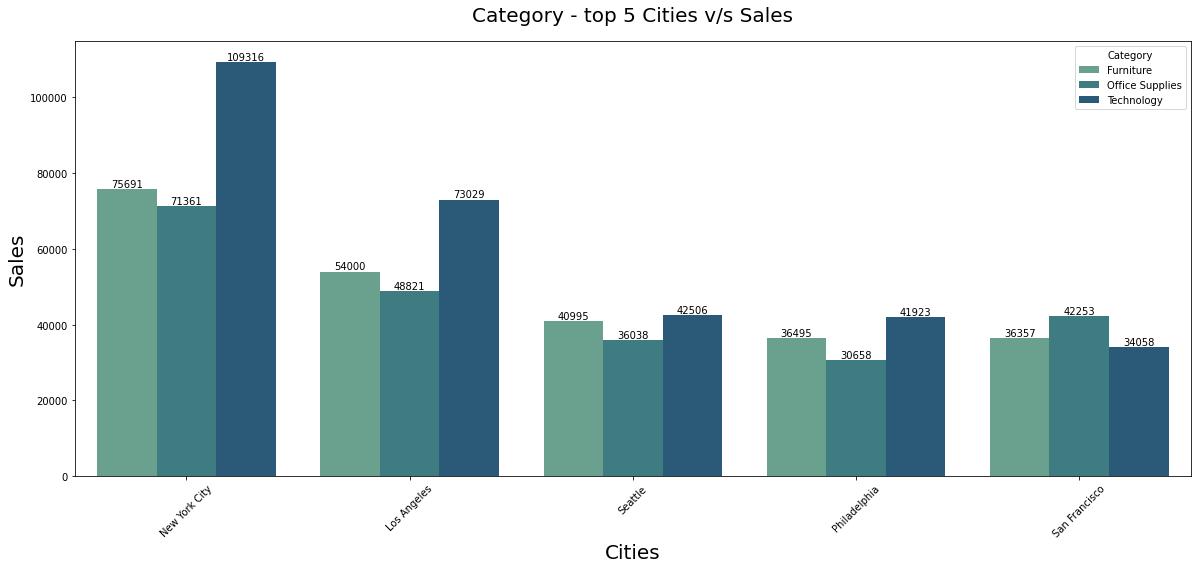

In [377]:
plt.figure(figsize=(20,8))

ax1 = sns.barplot(x='City',y='sum',hue='Category',data=City_five,ci=None,palette='crest')
for container in ax1.containers:
    ax1.bar_label(container,fmt='%d')
    ax1.set_title("Category - top 5 Cities v/s Sales",fontsize=20,pad=20)
plt.xticks(rotation = 45)
plt.xlabel('Cities', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.show()

- ### Category - Top 3 States v/s Sales

In [378]:
Cat_State = pd.DataFrame(df.groupby(['Category','State'])['Sales'].agg(['size','sum'])).reset_index()

In [379]:
Cat_State

Category       State  size          sum
0     Furniture     Alabama    11    6332.4800
1     Furniture     Arizona    49   13525.2910
2     Furniture    Arkansas     9    3187.5500
3     Furniture  California   444  156064.6015
4     Furniture    Colorado    51   13243.0370
..          ...         ...   ...          ...
137  Technology        Utah     7    2309.9040
138  Technology     Vermont     3    1599.7600
139  Technology    Virginia    36   24145.1600
140  Technology  Washington   100   50536.7100
141  Technology   Wisconsin    25    8798.1600

[142 rows x 4 columns]

In [380]:
State_five = Cat_State.groupby('Category').apply(lambda x : x.nlargest(3,'sum')).reset_index(drop=True)

In [381]:
State_five

Category       State  size          sum
0        Furniture  California   444  156064.6015
1        Furniture    New York   236   93372.7290
2        Furniture       Texas   202   60593.2918
3  Office Supplies  California  1198  142351.9480
4  Office Supplies    New York   684   90020.0420
5  Office Supplies       Texas   604   44490.5300
6       Technology  California   359  159271.0820
7       Technology    New York   208  127483.5000
8       Technology       Texas   179   65104.2240

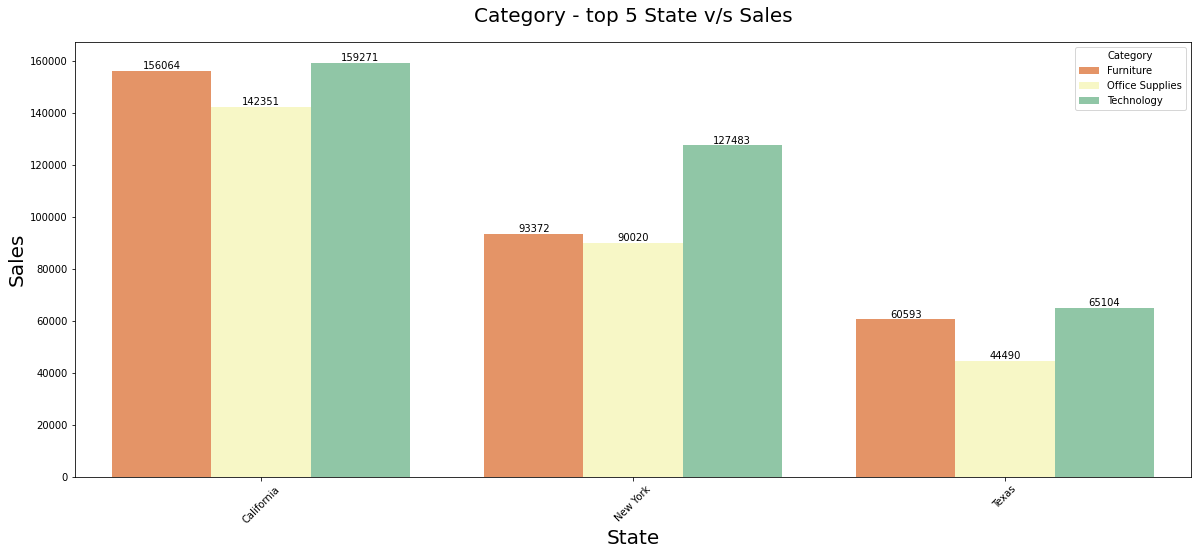

In [382]:
plt.figure(figsize=(20,8))

ax1 = sns.barplot(x='State',y='sum',hue='Category',data=State_five,ci=None,palette='Spectral')
for container in ax1.containers:
    ax1.bar_label(container,fmt='%d')
    ax1.set_title("Category - top 5 State v/s Sales",fontsize=20,pad=20)
plt.xticks(rotation = 45)
plt.xlabel('State', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.show()

- ### Category - Region v/s Sales

In [383]:
Cat_Region = pd.DataFrame(df.groupby(['Category','Region'])['Sales'].agg(['size','sum'])).reset_index()

In [384]:
Cat_Region

Category   Region  size          sum
0         Furniture  Central   481  163797.1638
1         Furniture     East   600  208009.8320
2         Furniture    South   332  117298.6840
3         Furniture     West   707  252612.7435
4   Office Supplies  Central  1422  167026.4150
5   Office Supplies     East  1712  205516.0550
6   Office Supplies    South   995  125651.3130
7   Office Supplies     West  1897  220853.2490
8        Technology  Central   420  170416.3120
9        Technology     East   535  264973.9810
10       Technology    South   293  148771.9080
11       Technology     West   599  251991.8320

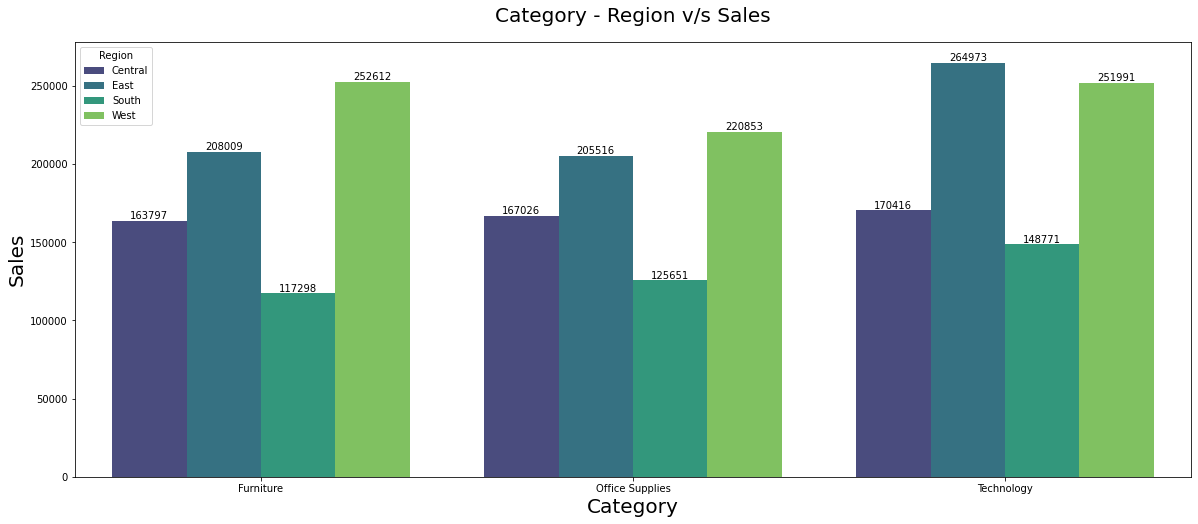

In [385]:
plt.figure(figsize=(20,8))

ax1 = sns.barplot(x='Category',y='sum',hue='Region',data=Cat_Region,ci=None,palette='viridis')
for container in ax1.containers:
    ax1.bar_label(container,fmt='%d')
    ax1.set_title("Category - Region v/s Sales",fontsize=20,pad=20)

plt.xlabel('Category', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.show()

- ### Category - Top 5 Sub-Category v/s Sales

In [386]:
Cat_SC = pd.DataFrame(df.groupby(['Category','Sub_Category'])['Sales'].agg(['size','sum'])).reset_index()

In [387]:
Cat_SC

Category Sub_Category  size          sum
0         Furniture    Bookcases   228  114879.9963
1         Furniture       Chairs   616  328167.7310
2         Furniture  Furnishings   957   91705.1640
3         Furniture       Tables   319  206965.5320
4   Office Supplies   Appliances   466  107532.1610
5   Office Supplies          Art   796   27118.7920
6   Office Supplies      Binders  1523  203412.7330
7   Office Supplies    Envelopes   254   16476.4020
8   Office Supplies    Fasteners   217    3024.2800
9   Office Supplies       Labels   364   12486.3120
10  Office Supplies        Paper  1370   78479.2060
11  Office Supplies      Storage   846  223843.6080
12  Office Supplies     Supplies   190   46673.5380
13       Technology  Accessories   775  167380.3180
14       Technology      Copiers    68  149528.0300
15       Technology     Machines   115  189238.6310
16       Technology       Phones   889  330007.0540

In [388]:
SC_five = Cat_SC.groupby('Category').apply(lambda x : x.nlargest(5,'sum')).reset_index(drop=True)

In [389]:
SC_five

Category Sub_Category  size          sum
0         Furniture       Chairs   616  328167.7310
1         Furniture       Tables   319  206965.5320
2         Furniture    Bookcases   228  114879.9963
3         Furniture  Furnishings   957   91705.1640
4   Office Supplies      Storage   846  223843.6080
5   Office Supplies      Binders  1523  203412.7330
6   Office Supplies   Appliances   466  107532.1610
7   Office Supplies        Paper  1370   78479.2060
8   Office Supplies     Supplies   190   46673.5380
9        Technology       Phones   889  330007.0540
10       Technology     Machines   115  189238.6310
11       Technology  Accessories   775  167380.3180
12       Technology      Copiers    68  149528.0300

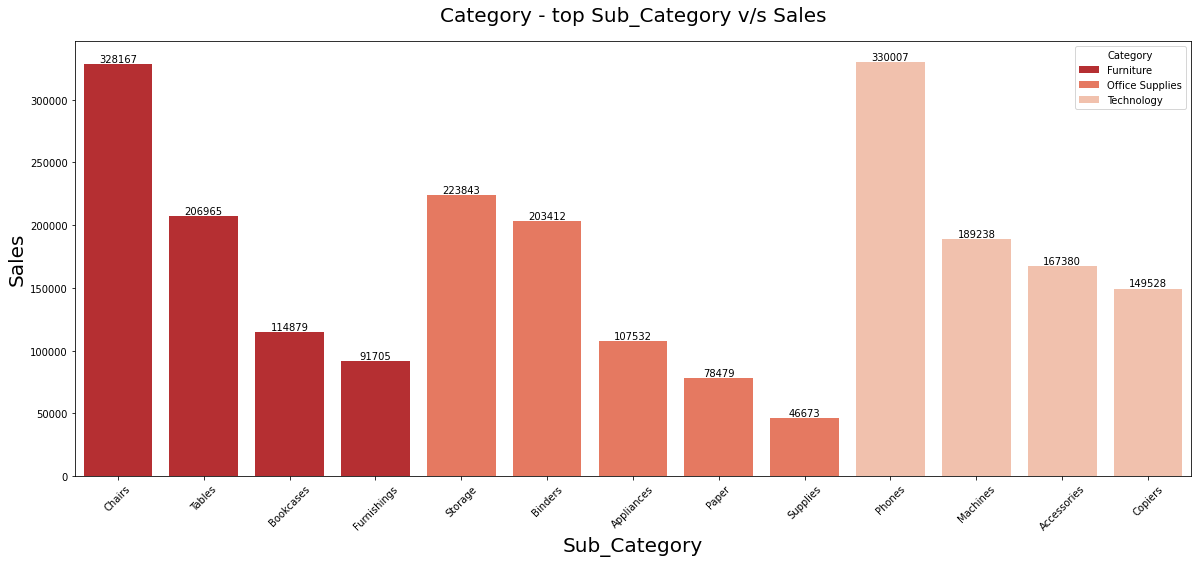

In [390]:
plt.figure(figsize=(20,8))

ax1 = sns.barplot(x='Sub_Category',y='sum',hue='Category',data=SC_five,ci=None,palette='Reds_r',dodge=False)
for container in ax1.containers:
    ax1.bar_label(container,fmt='%d')
    ax1.set_title("Category - top Sub_Category v/s Sales",fontsize=20,pad=20)
plt.xticks(rotation = 45)
plt.xlabel('Sub_Category', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.show()

- ### Category - Top 5 Product Name v/s Sales

In [391]:
Cat_Prod = pd.DataFrame(df.groupby(['Category','Product_Name'])['Sales'].agg(['size','sum'])).reset_index()

In [392]:
Cat_Prod

Category                                       Product_Name  size  \
0      Furniture                   12-1/2 Diameter Round Wall Clock     8   
1      Furniture                           24-Hour Round Wall Clock     6   
2      Furniture                           36X48 HARDFLOOR CHAIRMAT     6   
3      Furniture                   3M Hangers With Command Adhesive     8   
4      Furniture                 3M Polarizing Light Filter Sleeves     4   
...          ...                                                ...   ...   
1845  Technology  iKross Bluetooth Portable Keyboard + Cell Phon...     5   
1846  Technology                         iOttie HLCRIO102 Car Mount     5   
1847  Technology                                iOttie XL Car Mount     2   
1848  Technology  invisibleSHIELD by ZAGG Smudge-Free Screen Pro...     7   
1849  Technology                 netTALK DUO VoIP Telephone Service     7   

           sum  
0      551.448  
1      487.512  
2      369.248  
3      108.040  
4      216.340  
...        ...  
1845   477.660  
1846   215.892  
1847   223.888  
1848   442.554  
1849  1112.788  

[1850 rows x 4 columns]

In [393]:
Prod_five = Cat_Prod.groupby('Category').apply(lambda x : x.nlargest(5,'sum')).reset_index(drop=True)

In [394]:
Prod_five

Category                                       Product_Name  size  \
0         Furniture       HON 5400 Series Task Chairs for Big and Tall     8   
1         Furniture  Riverside Palais Royal Lawyers Bookcase, Royal...     5   
2         Furniture         Bretford Rectangular Conference Table Tops    12   
3         Furniture      Global Troy Executive Leather Low-Back Tilter     9   
4         Furniture                           SAFCO Arco Folding Chair    13   
5   Office Supplies  Fellowes PB500 Electric Punch Plastic Comb Bin...    10   
6   Office Supplies         GBC DocuBind TL300 Electric Binding System    11   
7   Office Supplies   GBC Ibimaster 500 Manual ProClick Binding System     9   
8   Office Supplies          GBC DocuBind P400 Electric Binding System     6   
9   Office Supplies        High Speed Automatic Electric Letter Opener     3   
10       Technology              Canon imageCLASS 2200 Advanced Copier     5   
11       Technology  Cisco TelePresence System EX90 Videoconferenci...     1   
12       Technology               Hewlett Packard LaserJet 3310 Copier     8   
13       Technology  HP Designjet T520 Inkjet Large Format Printer ...     3   
14       Technology          Lexmark MX611dhe Monochrome Laser Printer     4   

           sum  
0   21870.5760  
1   15610.9656  
2   12995.2915  
3   12975.3820  
4   11572.7800  
5   27453.3840  
6   19823.4790  
7   19024.5000  
8   17965.0680  
9   17030.3120  
10  61599.8240  
11  22638.4800  
12  18839.6860  
13  18374.8950  
14  16829.9010

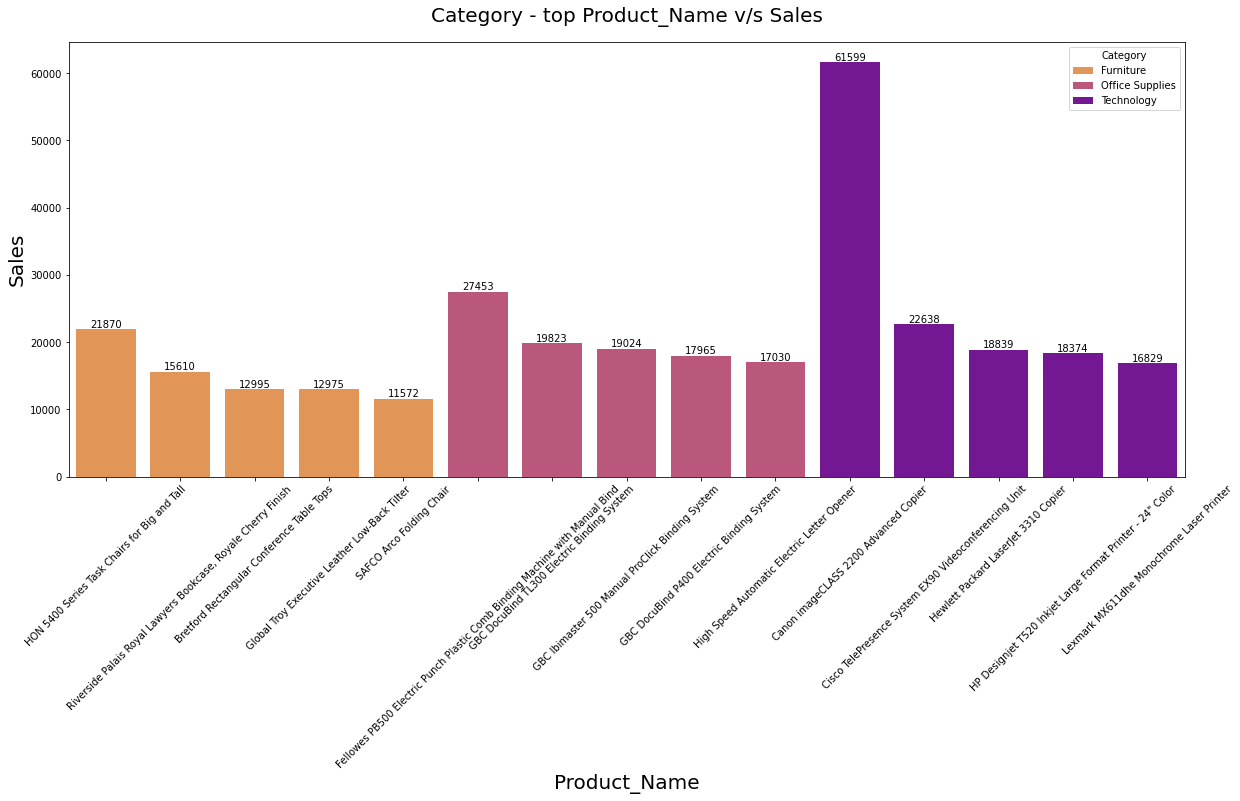

In [395]:
plt.figure(figsize=(20,8))

ax1 = sns.barplot(x='Product_Name',y='sum',hue='Category',data=Prod_five,ci=None,palette='plasma_r',dodge=False)
for container in ax1.containers:
    ax1.bar_label(container,fmt='%d')
    ax1.set_title("Category - top Product_Name v/s Sales",fontsize=20,pad=20)
plt.xticks(rotation = 45)
plt.xlabel('Product_Name', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.show()

### Categorywise Sales - Aggregated as sum

In [396]:
Sales_Fur = pd.DataFrame(df[df['Category'] == 'Furniture'].groupby('Year_Month')['Sales'].sum())

In [397]:
Sales_Off = pd.DataFrame(df[df['Category'] == 'Office Supplies'].groupby('Year_Month')['Sales'].sum())

In [398]:
Sales_Tech = pd.DataFrame(df[df['Category'] == 'Technology'].groupby('Year_Month')['Sales'].sum())

In [399]:
Sales_Total = pd.DataFrame(df.groupby('Year_Month')['Sales'].sum())

- #### Furniture

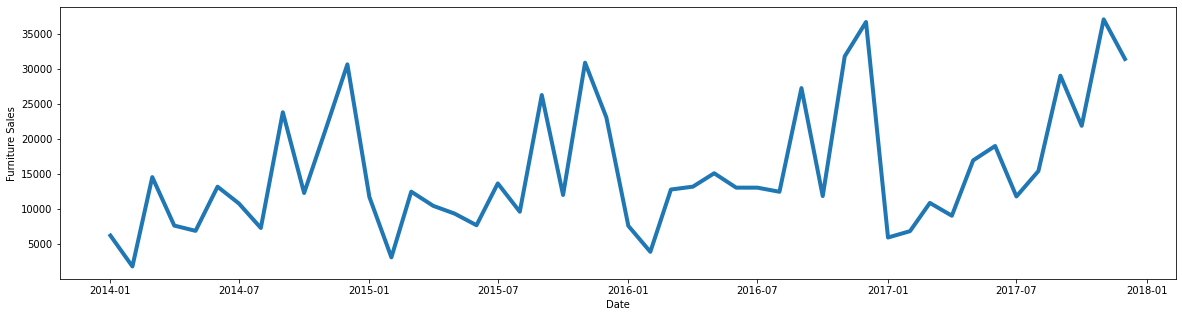

In [400]:
plt.figure(figsize=(20,5))
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.plot(Sales_Fur,lw=4)

### Defining a function for Rolling stats, ADF - Augumented Dickey Fuller Test and seasonal decomposition

In [401]:
def test_stationary(timeseries):
    
    # defining rolling stats
    MovingAvg = timeseries.rolling(window=12).mean()
    MovingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling stats
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries,color='Blue',label='Original',lw=3)
    mean = plt.plot(MovingAvg,color='red',label='Rolling mean',lw=3)
    std = plt.plot(MovingSTD,color='black',label='Rolling std deviation',lw=3)
    plt.legend(loc='best')
    plt.grid()
    plt.title("Rolling Stats",fontsize=15)
    plt.show()
    
    #Augumented Dickey Fuller
    print(blue('Dickey Fuller Test Results: ',['bold']))
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags','Number of obervation used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)
    
    # seasonal decomposition plot
    #Additive: y(t) = Level + Trend + Seasonality + Noise
    #Multiplicative = y(t) = Level * Trend * Seasonality * Noise
    
    plt.rc("figure",figsize=(20,15))
    #plt.figure(figsize=(25,10))
    decompose_plt = seasonal_decompose(timeseries,model='additive',period=1)
    decompose_plt.plot()
    plt.yticks(fontsize=10)
    plt.show()

### Checking stationarity for Sub-category: Furniture Sales

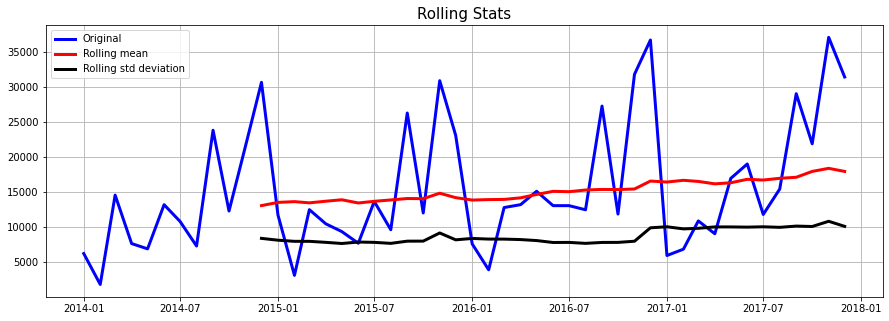

Dickey Fuller Test Results: 
Test Statistic               -4.697056
p-value                       0.000085
Lags                          0.000000
Number of obervation used    47.000000
Critical Value (1%)          -3.577848
Critical Value (5%)          -2.925338
Critical Value (10%)         -2.600774
dtype: float64


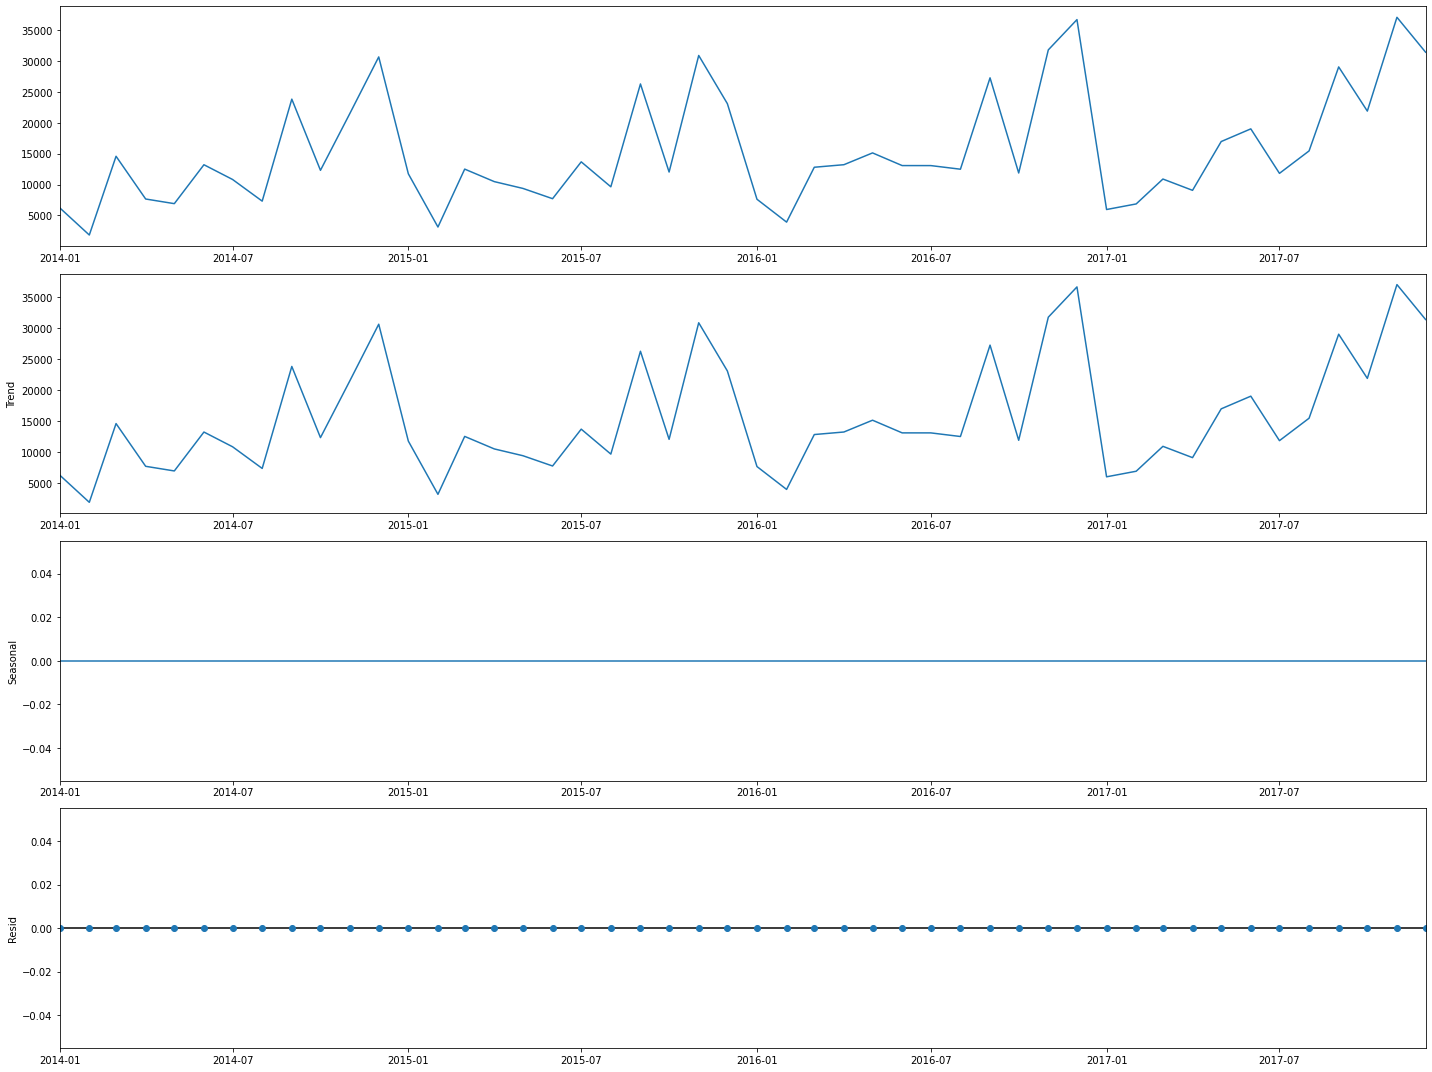

In [402]:
test_stationary(Sales_Fur)

 - #### From the rolling stats, ADF test (P-value < 0.05)  and decomposition the data is stationary for furniture
 - #### Mean and variance are constant

### Checking stationarity for Sub-category: Office Supplies Sales

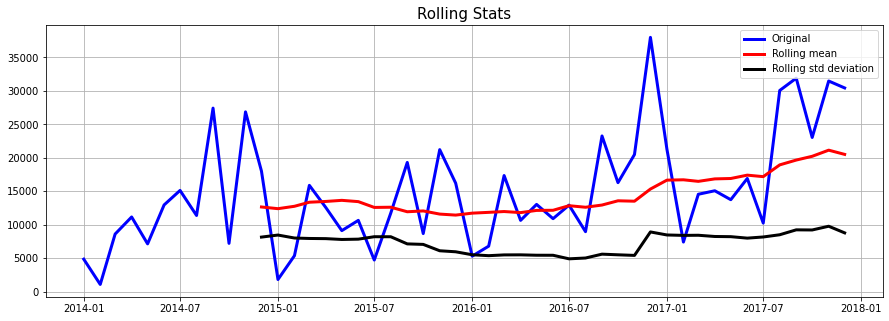

Dickey Fuller Test Results: 
Test Statistic               -1.905481
p-value                       0.329487
Lags                          2.000000
Number of obervation used    45.000000
Critical Value (1%)          -3.584829
Critical Value (5%)          -2.928299
Critical Value (10%)         -2.602344
dtype: float64


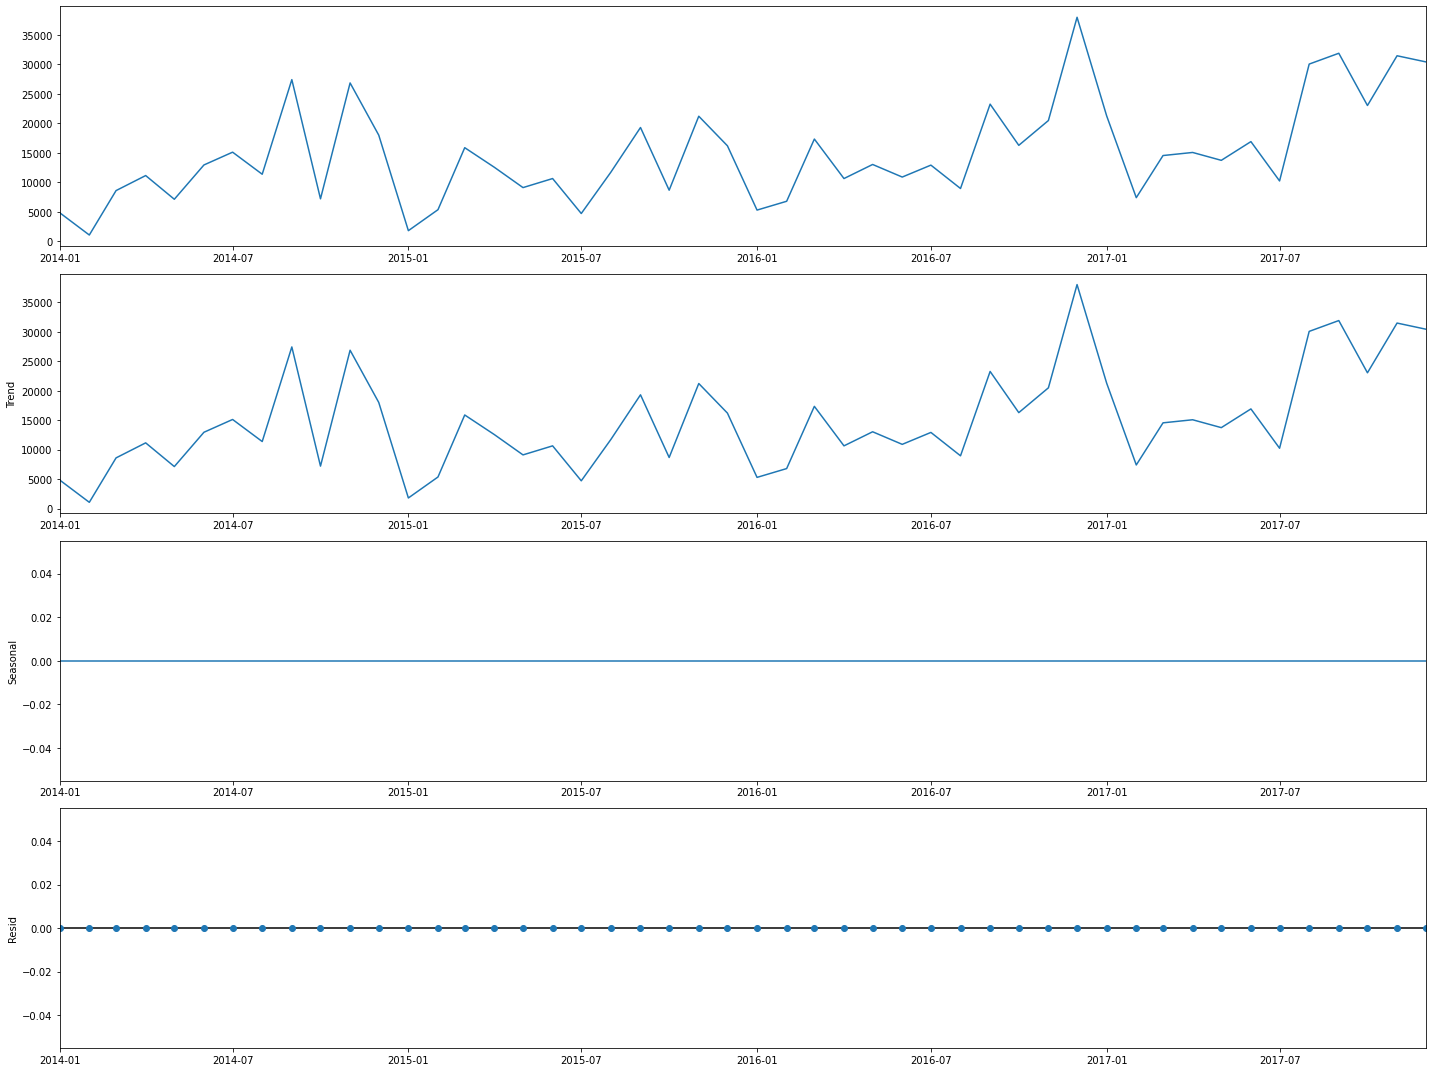

In [403]:
test_stationary(Sales_Off)

-  From the rolling stats, ADF test (P-value > 0.05) and decomposition the data is non-stationary for Office Supply
-  We will have to make the data stationary

### Checking stationarity for Sub-category: Technology Sales

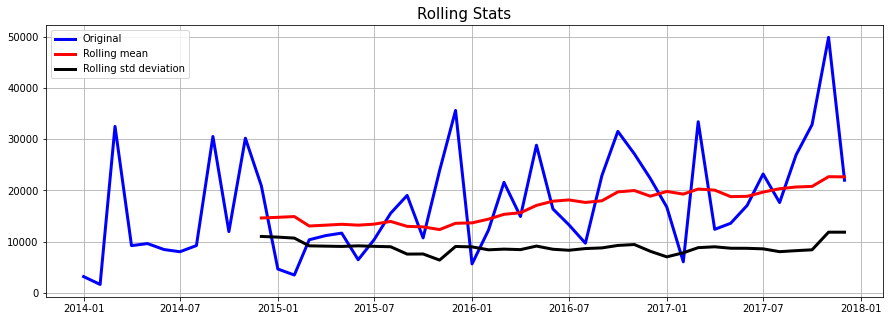

Dickey Fuller Test Results: 
Test Statistic               -5.522761
p-value                       0.000002
Lags                          0.000000
Number of obervation used    47.000000
Critical Value (1%)          -3.577848
Critical Value (5%)          -2.925338
Critical Value (10%)         -2.600774
dtype: float64


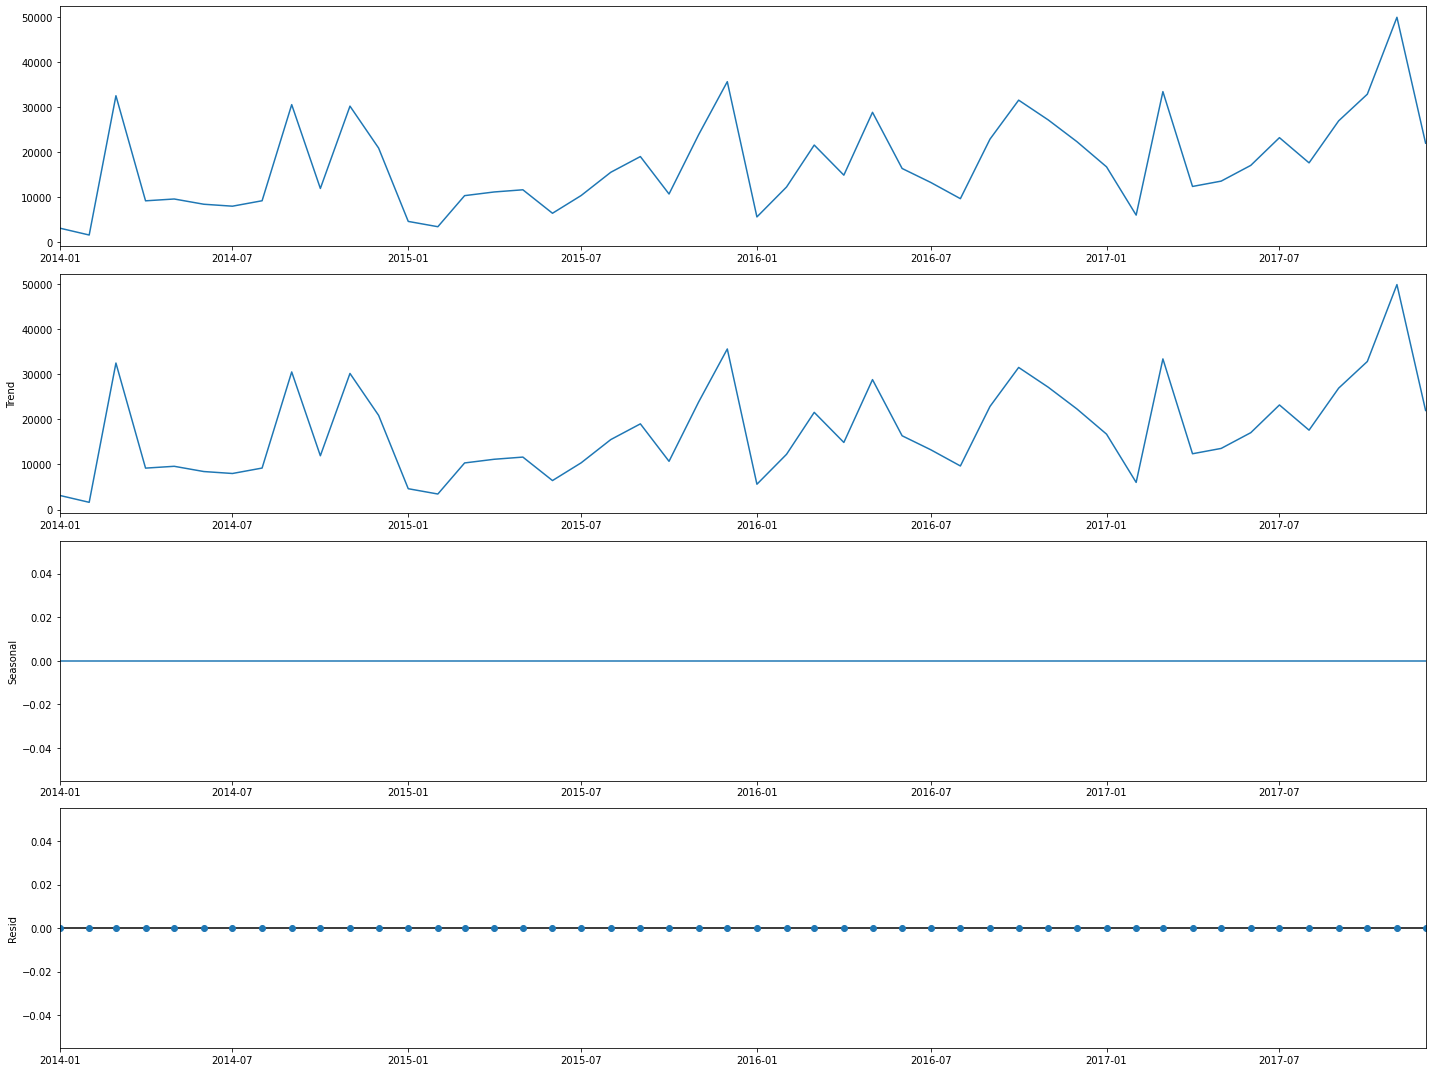

In [404]:
test_stationary(Sales_Tech)

 - From the rolling stats, ADF test (P-value < 0.05)  and decomposition the data is stationary for Technology

### Checking stationarity for Sub-category: Overall Sales

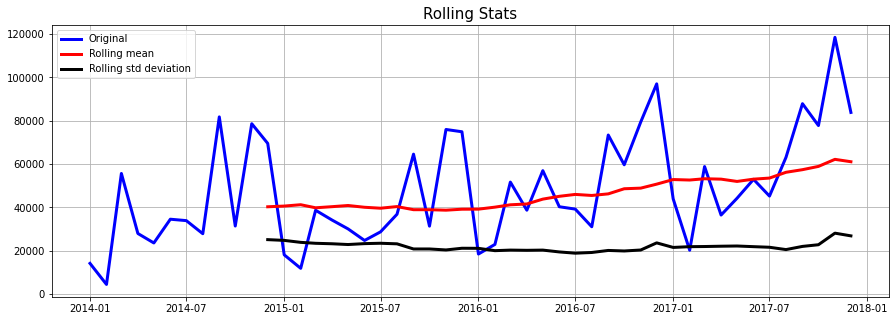

Dickey Fuller Test Results: 
Test Statistic               -4.493593
p-value                       0.000202
Lags                          0.000000
Number of obervation used    47.000000
Critical Value (1%)          -3.577848
Critical Value (5%)          -2.925338
Critical Value (10%)         -2.600774
dtype: float64


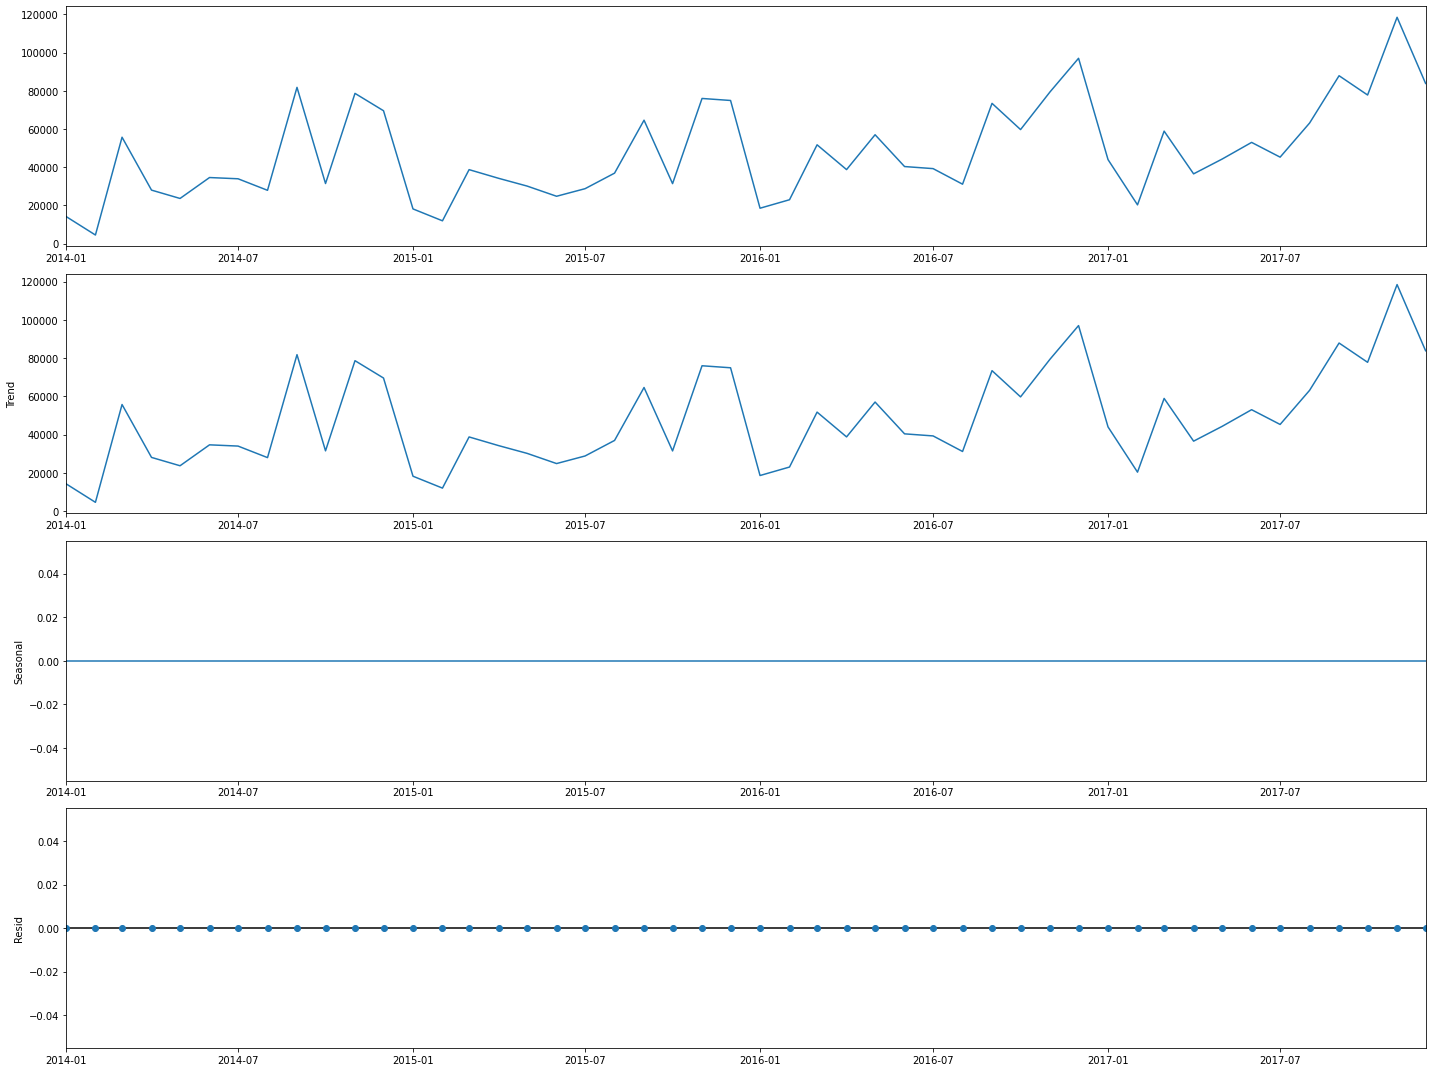

In [405]:
test_stationary(Sales_Total)

- From the rolling stats, ADF test (P-value < 0.05)  and decomposition the data is stationary for Sales

### Making Office Supply Sales stationary

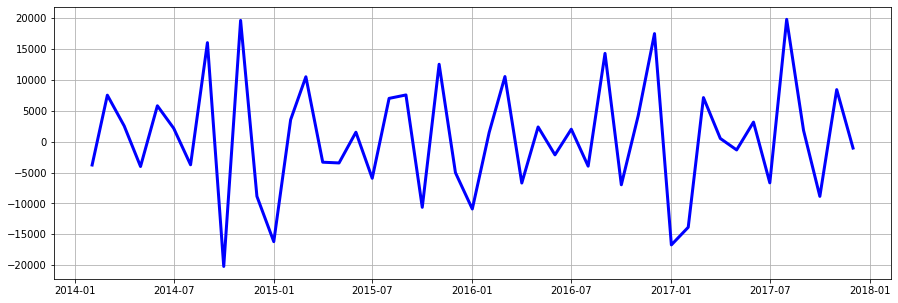

In [406]:
# Subtracting previous value with shift

OS_Shift = Sales_Off - Sales_Off.shift()

plt.figure(figsize=(15,5))
plt.plot(OS_Shift,color='blue',lw=3)
plt.grid()
plt.show()

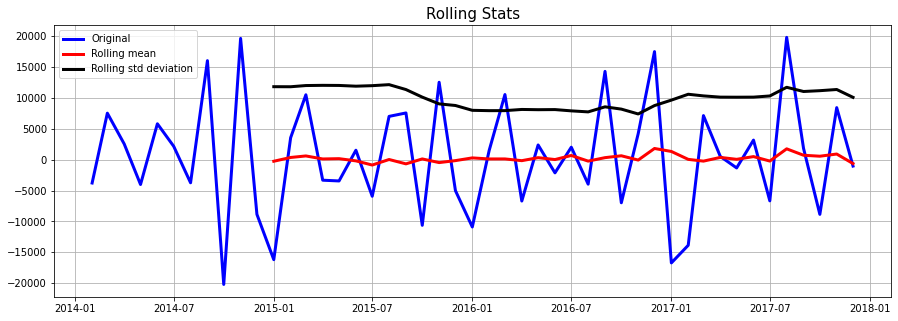

Dickey Fuller Test Results: 
Test Statistic               -4.308890
p-value                       0.000429
Lags                         10.000000
Number of obervation used    36.000000
Critical Value (1%)          -3.626652
Critical Value (5%)          -2.945951
Critical Value (10%)         -2.611671
dtype: float64


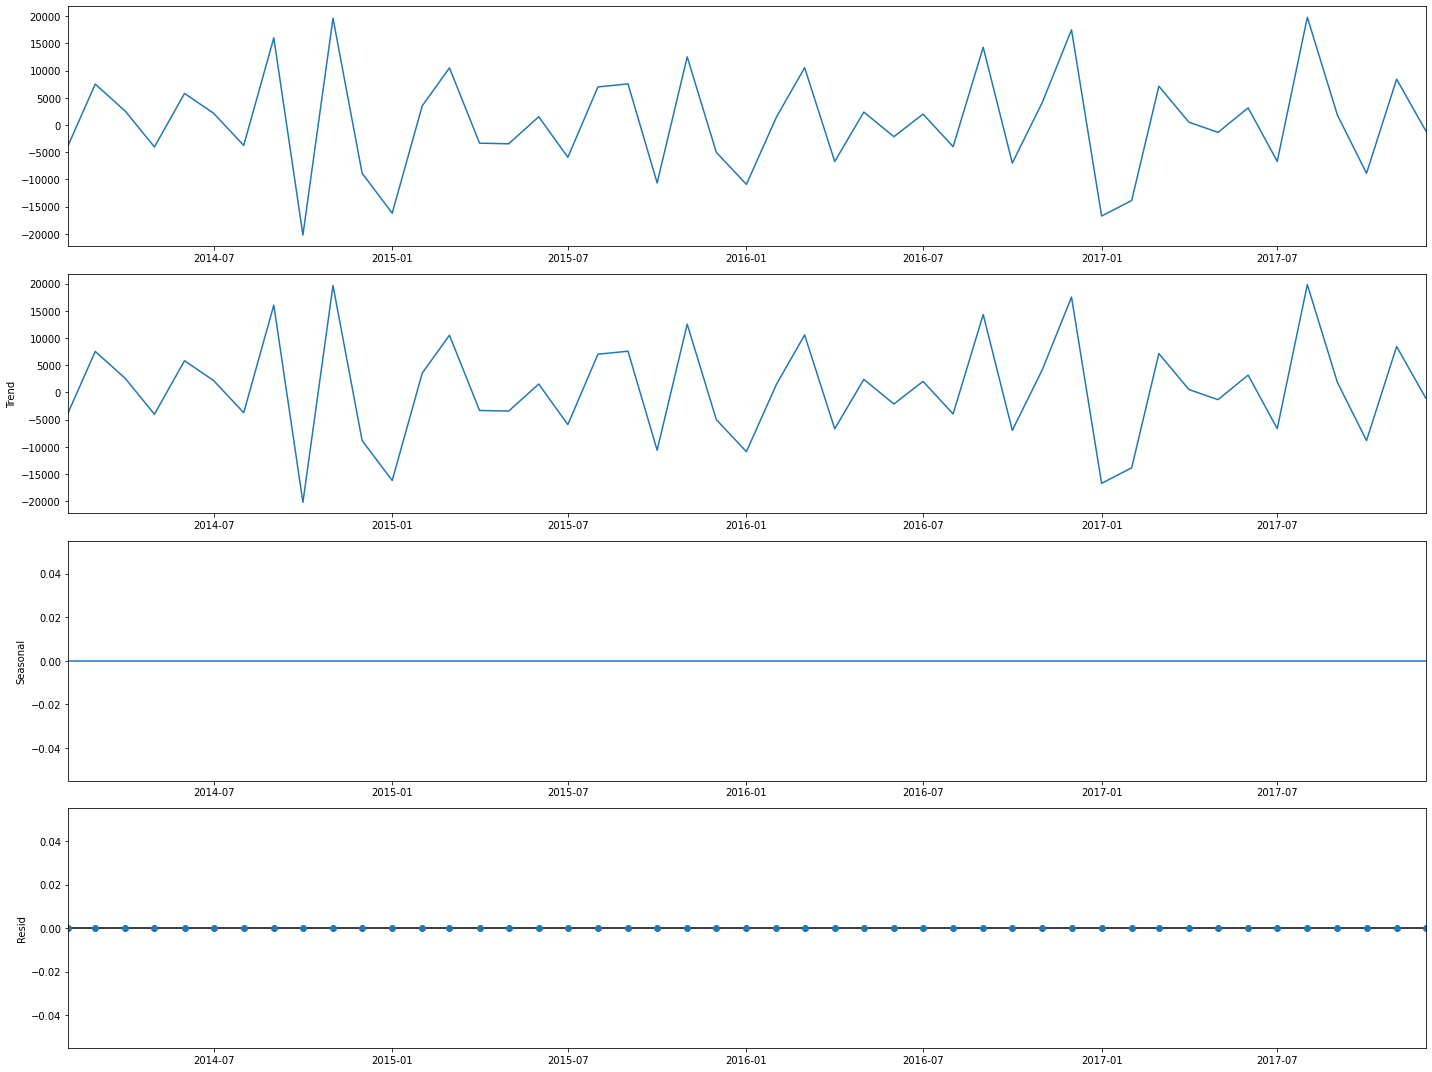

In [407]:
OS_Shift.dropna(inplace=True)
test_stationary(OS_Shift)

- From ADF test (p-value < 0.05) the data is stationary

### Function for ACF and PACF plot

In [408]:
def acf_pacf(timeseries):
    fig,ax = plt.subplots(2,1,figsize=(15,6))
    plt.subplots_adjust(hspace=0.5)
    ax1 = sm.graphics.tsa.plot_acf(timeseries,lags=12,ax=ax[0])
    ax2 = sm.graphics.tsa.plot_pacf(timeseries,lags=12,ax=ax[1])
    ax[0].grid()
    ax[1].grid()
    plt.show()

### Furniture - ACF and PACF plot

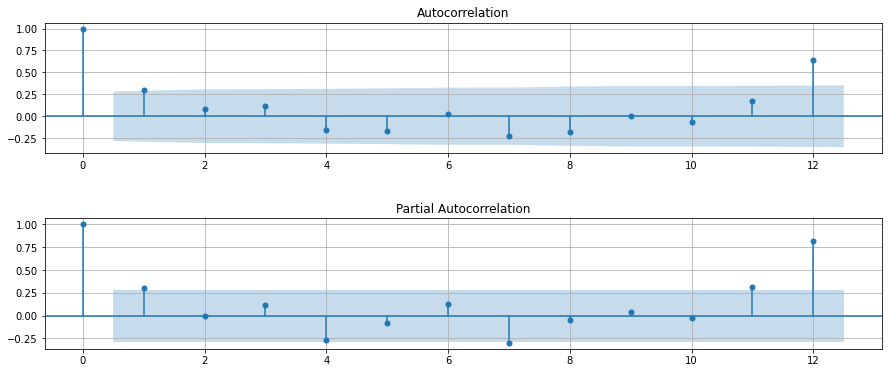

In [409]:
acf_pacf(Sales_Fur)

### Office Supply - ACF and PACF plot

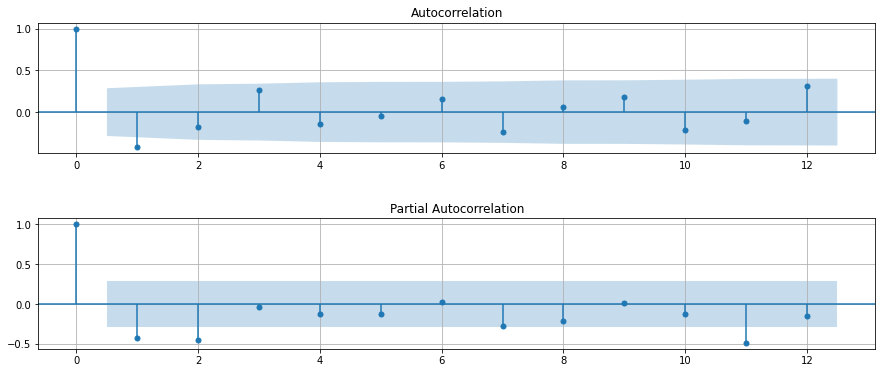

In [410]:
acf_pacf(OS_Shift)

### Technology - ACF and PACF plot

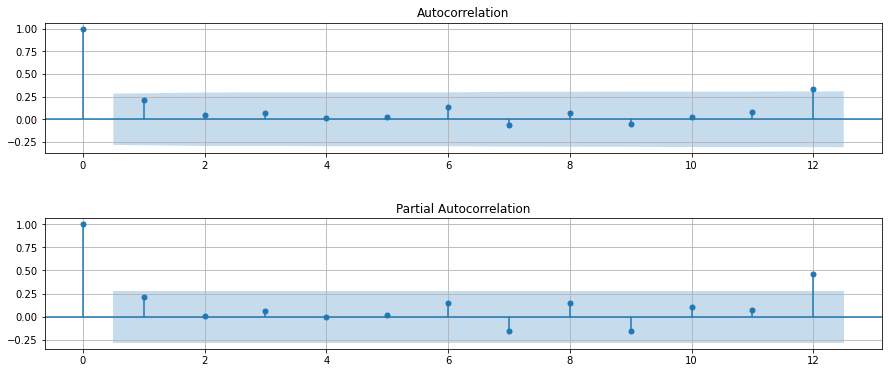

In [411]:
acf_pacf(Sales_Tech)

### Overall Sales - ACF and PACF plot

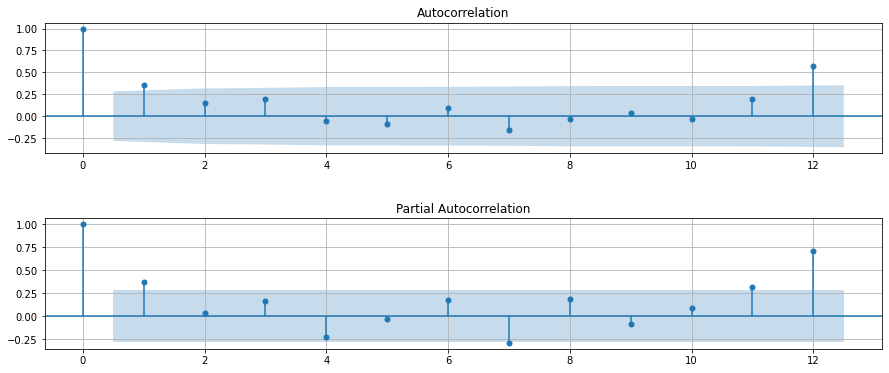

In [412]:
acf_pacf(Sales_Total)


| Category | AR (p) value from PACF | MA (q) from ACF |
| :--------|:-----------------------|:----------------|
|Furniture |1|1|
|Office Supply |1|1|
|Technology |12|12|
|Overall Sales |1|1|

### Finding stationarity using differencing - ndiffs

In [413]:
dfs = [Sales_Fur,Sales_Off,Sales_Tech,Sales_Total]
df_name = ['Furniture','Office Sales','Technology','Total Sales']

In [414]:
def diff_check (data, name):
    for df_sub,dfName in zip(dfs,df_name):
        val = ndiffs(df_sub,test='adf')
        if val > 0:
            print(dfName, "is not stationary as ndiff value is:", val)
        
        if val <= 0:
            print(dfName, "is stationary as ndiff value is:", val)       

In [415]:
diff_check(dfs,df_name)

Furniture is stationary as ndiff value is: 0
Office Sales is not stationary as ndiff value is: 1
Technology is stationary as ndiff value is: 0
Total Sales is not stationary as ndiff value is: 1


### Finding p,q using arma_order_select_ic

In [416]:
def find_pq (time_data,dfname):
    for x,y in zip(dfs,df_name):
        print(red(y,['bold']))
        #print(y)
        print(arma_order_select_ic(x))
        print('\n')

In [417]:
find_pq(dfs,df_name)

Furniture
{'bic':              0            1            2
0  1018.181902  1017.490752  1021.357089
1  1017.285328  1021.065057  1025.222203
2  1021.109710  1024.872870  1028.409763
3  1024.301879  1027.494088          NaN
4  1025.531214  1028.780512          NaN, 'bic_min_order': (1, 0)}


Office Sales
{'bic':              0            1            2
0  1011.974464  1009.915089  1013.758414
1  1009.126789  1011.335269  1015.175981
2  1012.420850  1015.202524  1018.212791
3  1012.690768  1016.155174  1015.995783
4  1015.944885  1019.718199          NaN, 'bic_min_order': (1, 0)}


Technology
{'bic':              0            1            2
0  1031.187096  1032.959533  1036.764672
1  1032.845991  1038.935365  1046.242378
2  1036.693534  1038.342740  1041.253864
3  1040.403454  1043.618105          NaN
4  1044.272286  1054.867820  1057.722700, 'bic_min_order': (0, 0)}


Total Sales
{'bic':              0            1            2
0  1115.873644  1113.395448  1117.180565
1  1112.609503  11

| Category | AR (p) value from arma_order_select_ic | MA (q) from arma_order_select_ic |
| :--------|:-----------------------|:----------------|
|Furniture |1|0|
|Office Supply |1|0|
|Technology |0|0|
|Overall Sales |1|0|

### Train-test split

In [418]:
train_F = Sales_Fur.iloc[0:38,:]
test_F = Sales_Fur.iloc[38:,:]

In [419]:
train_F.shape,test_F.shape

((38, 1), (10, 1))

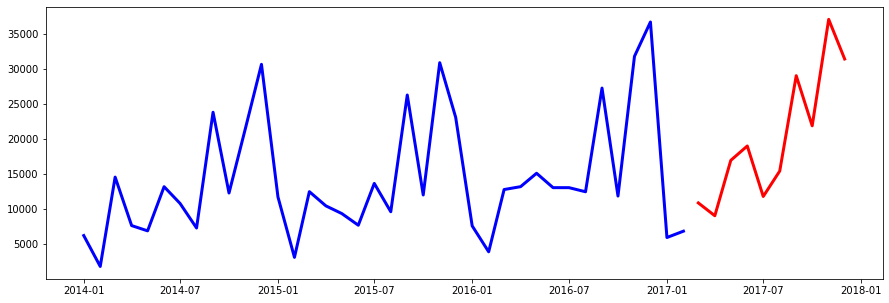

In [420]:
plt.figure(figsize=(15,5))
plt.plot(train_F,lw=3,color='blue')
plt.plot(test_F,lw=3,color='red')

In [136]:
Fur_pred = pd.DataFrame(model_F.predict(test_F.index[0],test_F.index[-1]),index = test_F.index)
Fur_pred.columns = ['Pred_Fur']
Fur_pred

Pred_Fur
Year_Month              
2017-03-01  12794.616163
2017-04-01  13863.339001
2017-05-01  14056.003440
2017-06-01  14090.736100
2017-07-01  14096.997544
2017-08-01  14098.126328
2017-09-01  14098.329820
2017-10-01  14098.366505
2017-11-01  14098.373118
2017-12-01  14098.374310

In [421]:
Fur_arima_model = ARIMA(train_F,order=(1,0,0))
model_F = Fur_arima_model.fit()
print(model_F.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                   38
Model:                     ARMA(1, 0)   Log Likelihood                -397.509
Method:                       css-mle   S.D. of innovations           8445.422
Date:                Tue, 10 May 2022   AIC                            801.017
Time:                        21:29:15   BIC                            805.930
Sample:                    01-01-2014   HQIC                           802.765
                         - 02-01-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.41e+04   1664.452      8.470      0.000    1.08e+04    1.74e+04
ar.L1.Sales     0.1803      0.161      1.121      0.262      -0.135       0.495
                                    Roots       

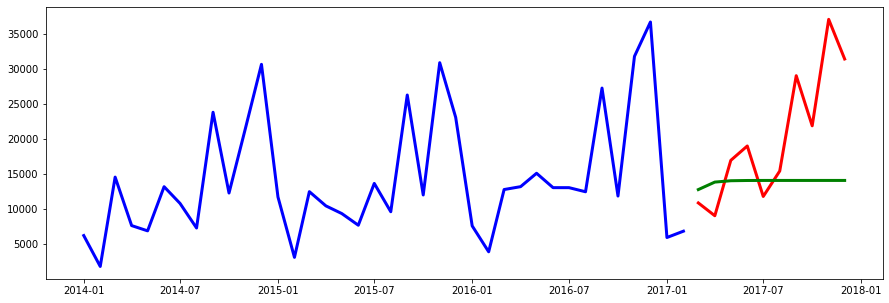

In [422]:
plt.figure(figsize=(15,5))
plt.plot(train_F,lw=3,color='blue')
plt.plot(test_F,lw=3,color='red')
plt.plot(Fur_pred,lw=3,color='green')

### Model building

### Dickey fuller using pmdarima

In [423]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(Sales_Fur)

(0.04677159319754321, False)

In [424]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(Sales_Off)

(0.24518584563173051, True)

In [425]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(Sales_Tech)

(0.0442590978283241, False)

In [426]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(Sales_Total)

(0.07091883112800618, True)

### Furniture Prediction - Monthly

In [427]:
M_Fur=auto_arima(train_F,start_p=1,d=1,start_q=0,
          max_p=5,max_d=5,max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5,max_D=5,
          max_Q=5, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=511.880, Time=0.02 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=512.743, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=510.827, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=511.458, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=510.049, Time=0.12 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=511.764, Time=0.38 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=511.832, Time=0.40 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=510.388, Time=0.21 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=513.764, Time=0.50 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=511.828, Time=0.07 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=512.257, Time=0.17 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=510.173, Time=0.20 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=509.605, Time=0.23 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=510.531, Time=0.11 sec
 ARIMA(0,1,1)(3,1,0)[12]         

In [428]:
M_Fur.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   38
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -250.802
Date:                             Tue, 10 May 2022   AIC                            509.605
Time:                                     21:29:41   BIC                            514.480
Sample:                                          0   HQIC                           510.957
                                              - 38                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3580      0.126     -2.842      0.004      -0.605      -0.111
ar.S.L12      -0.1528      0.117     -1.309      0.191      -0.382       0.076
ar.S.L24       0.2924      0.159      1.845      0.065      -0.018       0.603
sigma2      2.627e+07   1.15e-09   2.29e+16      0.000    2.63e+07    2.63e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.11   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.15   Prob(JB):                         0.76
Heteroskedasticity (H):               0.67   Skew:                            -0.17
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.84e+32. Standard errors may be unstable.
"""

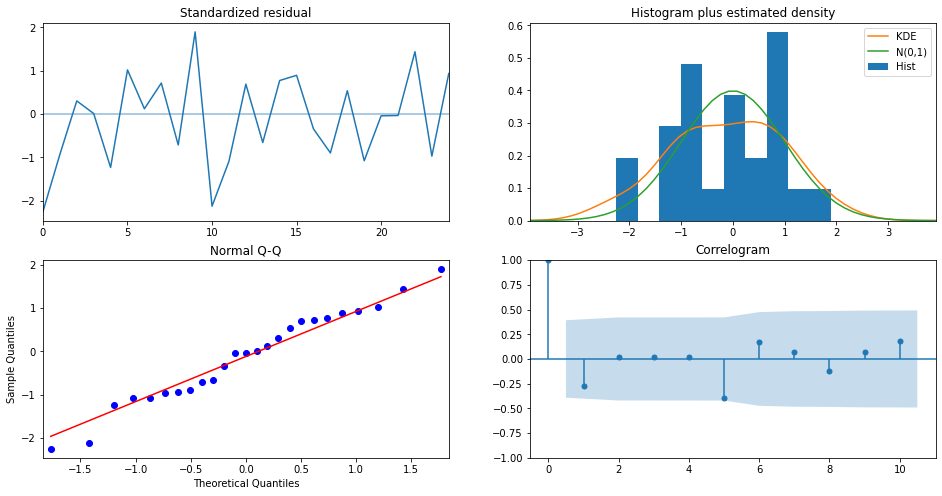

In [429]:
M_Fur.plot_diagnostics(figsize=(16, 8))
plt.show()

In [430]:
Pred_1 = pd.DataFrame(M_Fur.predict(n_periods=10),index=test_F.index)
Pred_1.columns = ['Predirct_Fur']
Pred_1

Predirct_Fur
Year_Month              
2017-03-01  13113.742644
2017-04-01  14581.556918
2017-05-01  15927.097784
2017-06-01  11611.077853
2017-07-01  14960.862905
2017-08-01  13691.690156
2017-09-01  28795.273899
2017-10-01  12780.216609
2017-11-01  35335.327118
2017-12-01  33355.492487

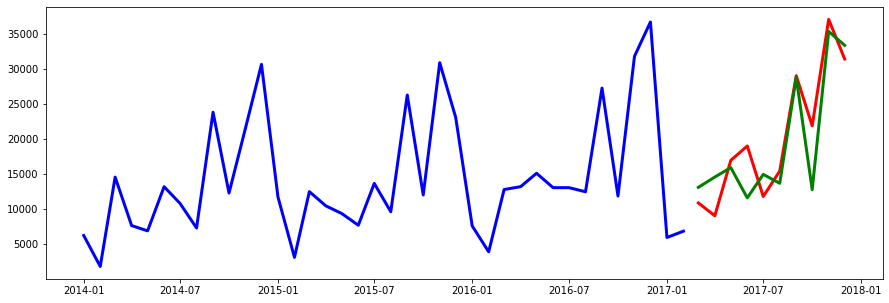

In [431]:
plt.figure(figsize=(15,5))
plt.plot(train_F,lw=3,color='blue')
plt.plot(test_F,lw=3,color='red')
plt.plot(Pred_1,lw=3,color='green')

In [434]:
test_F['Fur_prediciton'] = Pred_1
r2_score(test_F['Sales'],test_F['Fur_prediciton'])

0.7595496117005598

In [435]:
mse = mean_squared_error(test_F['Sales'],test_F['Fur_prediciton'])

In [436]:
print(mse)

19380093.59613129


In [437]:
rmse = sqrt(mse)

In [438]:
print(rmse)

4402.282771032694


### Weekly Prediction

In [439]:
df.head()

Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer_Name    Segment             City       State  Postal_Code  ...  \
0      Claire Gute   Consumer        Henderson    Kentucky        42420  ...   
1      Claire Gute   Consumer        Henderson    Kentucky        42420  ...   
2  Darrin Van Huff  Corporate      Los Angeles  California        90036  ...   
3   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311  ...   
4   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311  ...   

          Category Sub_Category  \
0        Furniture    Bookcases   
1        Furniture       Chairs   
2  Office Supplies       Labels   
3        Furniture       Tables   
4  Office Supplies      Storage   

                                        Product_Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

   Discount    Profit  Month  Year  Year_Month  
0      0.00   41.9136     11  2016  2016-11-01  
1      0.00  219.5820     11  2016  2016-11-01  
2      0.00    6.8714      6  2016  2016-06-01  
3      0.45 -383.0310     10  2015  2015-10-01  
4      0.20    2.5164     10  2015  2015-10-01  

[5 rows x 22 columns]

In [440]:
df['Week'] = pd.DatetimeIndex(df['Order_Date']).week

In [441]:
df.head()

Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer_Name    Segment             City       State  Postal_Code  ...  \
0      Claire Gute   Consumer        Henderson    Kentucky        42420  ...   
1      Claire Gute   Consumer        Henderson    Kentucky        42420  ...   
2  Darrin Van Huff  Corporate      Los Angeles  California        90036  ...   
3   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311  ...   
4   Sean O'Donnell   Consumer  Fort Lauderdale     Florida        33311  ...   

  Sub_Category                                       Product_Name     Sales  \
0    Bookcases                  Bush Somerset Collection Bookcase  261.9600   
1       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400   
2       Labels  Self-Adhesive Address Labels for Typewriters b...   14.6200   
3       Tables      Bretford CR4500 Series Slim Rectangular Table  957.5775   
4      Storage                     Eldon Fold 'N Roll Cart System   22.3680   

  Quantity Discount    Profit  Month  Year  Year_Month  Week  
0        2     0.00   41.9136     11  2016  2016-11-01    45  
1        3     0.00  219.5820     11  2016  2016-11-01    45  
2        2     0.00    6.8714      6  2016  2016-06-01    23  
3        5     0.45 -383.0310     10  2015  2015-10-01    41  
4        2     0.20    2.5164     10  2015  2015-10-01    41  

[5 rows x 23 columns]

In [442]:
df_week = df[['Order_Date','Category','Sales']]

In [443]:
df_week

Order_Date         Category     Sales
0    2016-11-08        Furniture  261.9600
1    2016-11-08        Furniture  731.9400
2    2016-06-12  Office Supplies   14.6200
3    2015-10-11        Furniture  957.5775
4    2015-10-11  Office Supplies   22.3680
...         ...              ...       ...
9989 2014-01-21        Furniture   25.2480
9990 2017-02-26        Furniture   91.9600
9991 2017-02-26       Technology  258.5760
9992 2017-02-26  Office Supplies   29.6000
9993 2017-05-04  Office Supplies  243.1600

[9993 rows x 3 columns]

In [444]:
type(df_week)

pandas.core.frame.DataFrame

In [445]:
df_week['Order_Date'] = df_week['Order_Date'] - pd.to_timedelta(arg=df_week['Order_Date'].dt.weekday,unit='D')

In [446]:
df_week.set_index('Order_Date')

Category     Sales
Order_Date                           
2016-11-07        Furniture  261.9600
2016-11-07        Furniture  731.9400
2016-06-06  Office Supplies   14.6200
2015-10-05        Furniture  957.5775
2015-10-05  Office Supplies   22.3680
...                     ...       ...
2014-01-20        Furniture   25.2480
2017-02-20        Furniture   91.9600
2017-02-20       Technology  258.5760
2017-02-20  Office Supplies   29.6000
2017-05-01  Office Supplies  243.1600

[9993 rows x 2 columns]

In [447]:
W_Sales_Tech = pd.DataFrame(df_week[df_week['Category'] == 'Technology'].groupby('Order_Date')['Sales'].sum())

In [448]:
W_Sales_Fur = pd.DataFrame(df_week[df_week['Category'] == 'Furniture'].groupby('Order_Date')['Sales'].sum())

In [449]:
W_Sales_OS = pd.DataFrame(df_week[df_week['Category'] == 'Office Supplies'].groupby('Order_Date')['Sales'].sum())

#### Furniture - Weekly Sales

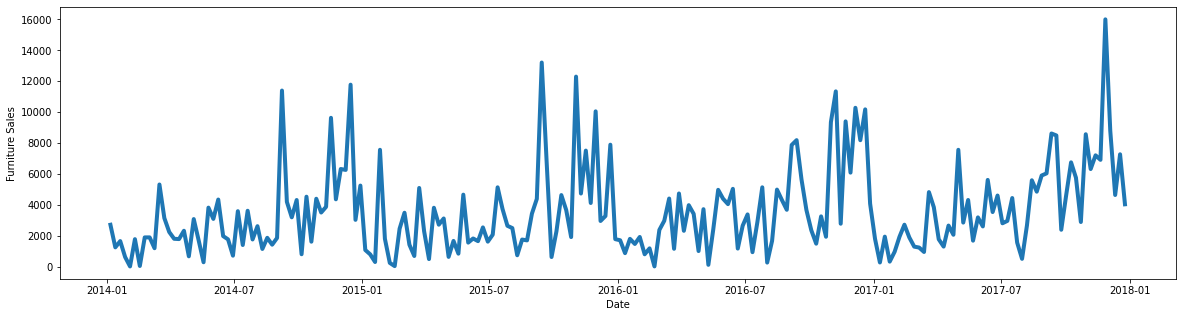

In [450]:
plt.figure(figsize=(20,5))
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.plot(W_Sales_Fur,lw=4)

### Weekly : Defining a function for Rolling stats, ADF - Augumented Dickey Fuller Test and seasonal decomposition

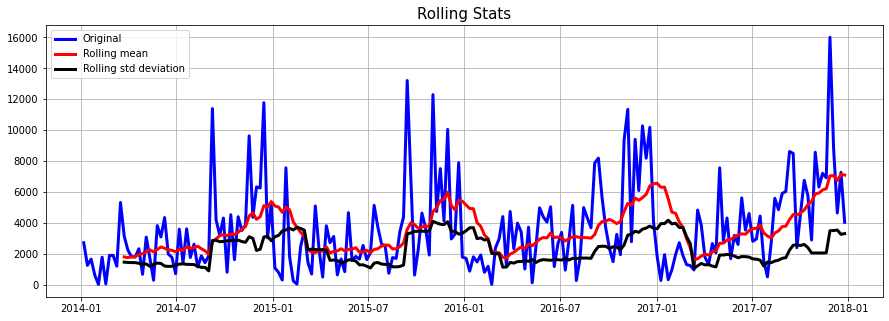

Dickey Fuller Test Results: 
Test Statistic                -3.443323
p-value                        0.009568
Lags                           6.000000
Number of obervation used    201.000000
Critical Value (1%)           -3.463309
Critical Value (5%)           -2.876029
Critical Value (10%)          -2.574493
dtype: float64


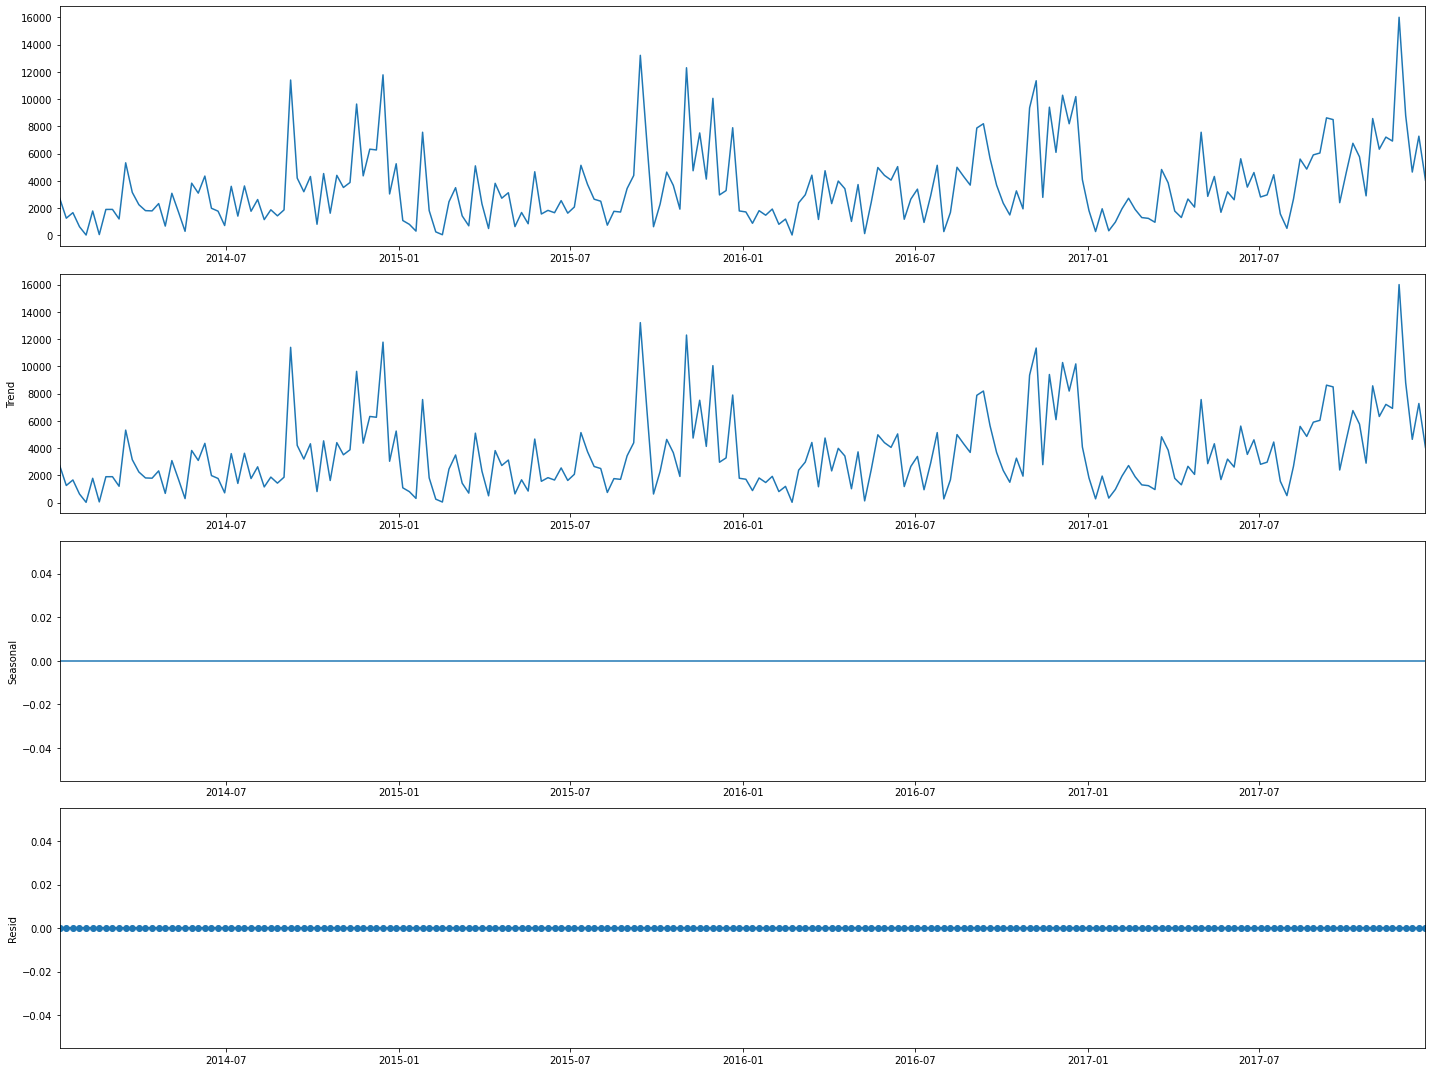

In [451]:
test_stationary(W_Sales_Fur)

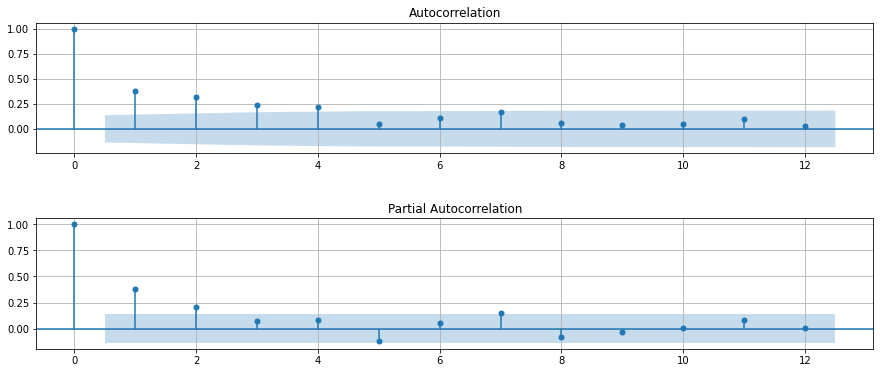

In [452]:
acf_pacf(W_Sales_Fur)

In [453]:
W_Sales_Fur.shape

(208, 1)

In [454]:
W_train_F = W_Sales_Fur.iloc[0:165,:]
W_test_F = W_Sales_Fur.iloc[165:,:]

In [455]:
W_train_F.shape,W_test_F.shape

((165, 1), (43, 1))

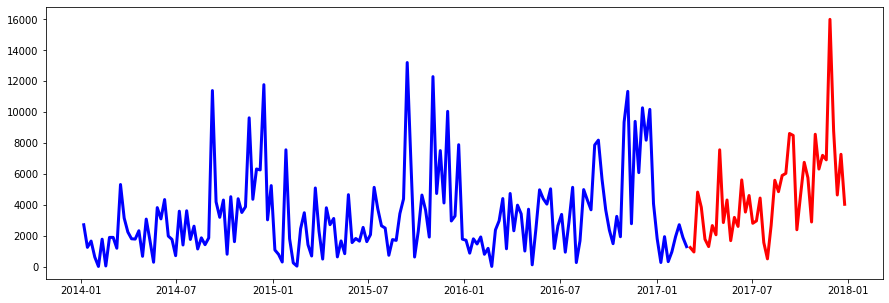

In [456]:
plt.figure(figsize=(15,5))
plt.plot(W_train_F,lw=3,color='blue')
plt.plot(W_test_F,lw=3,color='red')

In [457]:
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(W_Sales_Fur)

(0.01, False)

In [458]:
W_Fur=auto_arima(W_train_F,start_p=0,d=1,start_q=0,
          max_p=5,max_d=5,max_q=5, start_P=0,D=1,
          start_Q=0, max_P=5,max_D=5,
          max_Q=5,m=52, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=2213.746, Time=0.58 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=inf, Time=3.99 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=4.04 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=inf, Time=1.00 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=inf, Time=7.48 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=inf, Time=8.47 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=2165.753, Time=0.23 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=6.72 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=12.63 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=2144.524, Time=0.39 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=2111.653, Time=8.15 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=inf, Time=24.48 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=inf, Time=14.33 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=inf, Time=11.69 sec
 ARIMA(2,1,0)(2,1,1)[52]             : AIC=inf, Time=46.93 sec
 A

In [459]:
W_Fur.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  165
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -1051.826
Date:                            Tue, 10 May 2022   AIC                           2111.653
Time:                                    21:36:22   BIC                           2122.527
Sample:                                         0   HQIC                          2116.064
                                            - 165                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8267      0.088     -9.398      0.000      -0.999      -0.654
ar.L2         -0.3747      0.073     -5.130      0.000      -0.518      -0.232
ar.S.L52      -0.5679      0.085     -6.644      0.000      -0.735      -0.400
sigma2      8.151e+06   9.88e+05      8.250      0.000    6.21e+06    1.01e+07
===================================================================================
Ljung-Box (L1) (Q):                   3.25   Jarque-Bera (JB):                 8.99
Prob(Q):                              0.07   Prob(JB):                         0.01
Heteroskedasticity (H):               1.24   Skew:                             0.45
Prob(H) (two-sided):                  0.51   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

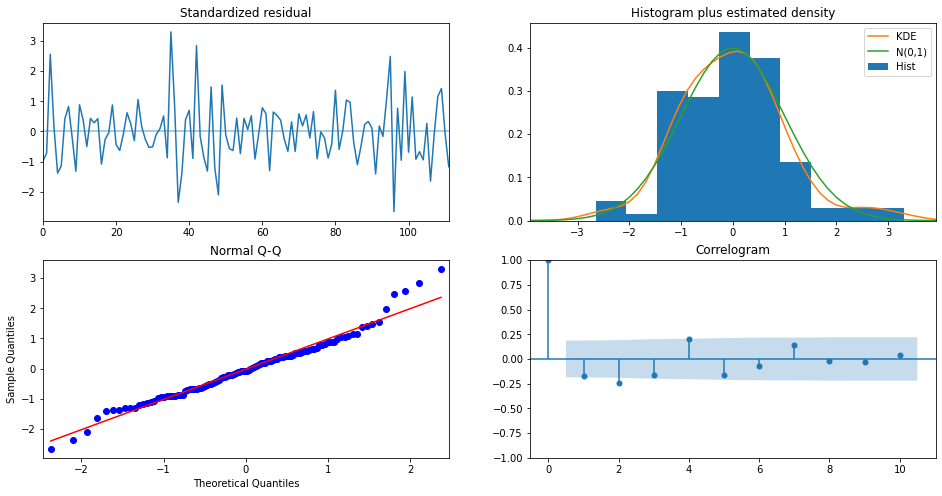

In [460]:
W_Fur.plot_diagnostics(figsize=(16, 8))
plt.show()

In [461]:
W_Fur_Pred = pd.DataFrame(W_Fur.predict(n_periods=43),index=W_test_F.index)
W_Fur_Pred.columns = ['Weekly_Predirct_Fur']
W_Fur_Pred

Weekly_Predirct_Fur
Order_Date                     
2017-03-06          2832.588848
2017-03-13          1834.256630
2017-03-20          3006.073058
2017-03-27          3352.488736
2017-04-03           934.425665
2017-04-10          3680.222930
2017-04-17          2827.924211
2017-04-24          1952.234910
2017-05-01          1758.635231
2017-05-08           774.141155
2017-05-15          1294.297854
2017-05-22          4577.337061
2017-05-29          2559.323610
2017-06-05          2561.813381
2017-06-12          2892.811170
2017-06-19          1725.954745
2017-06-26          1842.894008
2017-07-03          2415.087699
2017-07-10          3098.235172
2017-07-17          3143.513397
2017-07-24          3498.161654
2017-07-31          1309.517149
2017-08-07           917.965679
2017-08-14          2928.743074
2017-08-21          2608.376191
2017-08-28          3316.969579
2017-09-04          5671.260513
2017-09-11         10818.579502
2017-09-18          6074.075510
2017-09-25          1719.515420
2017-10-02          2093.238233
2017-10-09          3051.746677
2017-10-16          3261.512098
2017-10-23          1701.604181
2017-10-30         10804.972493
2017-11-06          7368.249391
2017-11-13          5244.038799
2017-11-20          6181.164095
2017-11-27          8116.320017
2017-12-04          5899.354912
2017-12-11          5176.419231
2017-12-18          8659.263315
2017-12-25          2550.599850

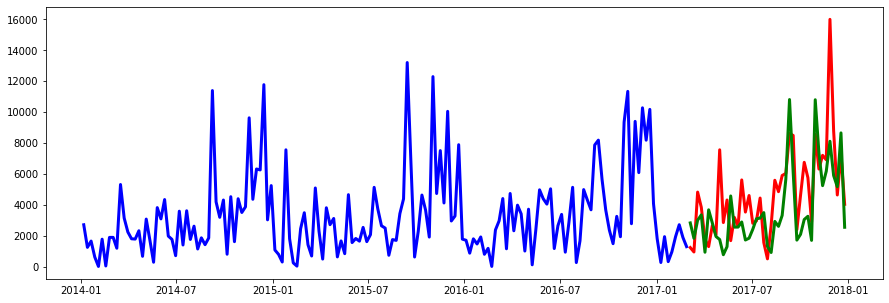

In [462]:
plt.figure(figsize=(15,5))
plt.plot(W_train_F,lw=3,color='blue')
plt.plot(W_test_F,lw=3,color='red')
plt.plot(W_Fur_Pred,lw=3,color='green')

In [463]:
W_test_F['W_Fur_predict'] = W_Fur_Pred
r2_score(W_test_F['Sales'],W_test_F['W_Fur_predict'])

0.3217464134476591

In [464]:
mse_1 = mean_squared_error(W_test_F['Sales'],W_test_F['W_Fur_predict'])

In [465]:
print(mse_1)

5587041.9673824


In [466]:
print(sqrt(mse_1))

2363.6924434837965


### Future Forecasting

In [546]:
future_dates=[W_Sales_Fur.index[-1]+ DateOffset(weeks=x)for x in range(0,104)]

In [547]:
pred_WFur_df=pd.DataFrame(index=future_dates[1:],columns=W_Sales_Fur.columns)

In [548]:
future_df=pd.concat([W_Sales_Fur,pred_WFur_df])

In [549]:
future_df.isnull().sum()

Sales    103
dtype: int64

In [550]:
Orig_Fur = future_df.iloc[0:208,:]
Fore_Fur = future_df.iloc[208:,:]

In [551]:
Orig_Fur.shape,Fore_Fur.shape

((208, 1), (103, 1))

In [552]:
Fur_weekly_Fore = pd.DataFrame(W_Fur.predict(n_periods=103),index=Fore_Fur.index)
Fur_weekly_Fore.columns = ['Weekly_Forecast']
Fur_weekly_Fore

Weekly_Forecast
2018-01-01      2832.588848
2018-01-08      1834.256630
2018-01-15      3006.073058
2018-01-22      3352.488736
2018-01-29       934.425665
...                     ...
2019-11-18       286.684372
2019-11-25       878.072883
2019-12-02      1341.083139
2019-12-09      2020.092805
2019-12-16      1110.544061

[103 rows x 1 columns]

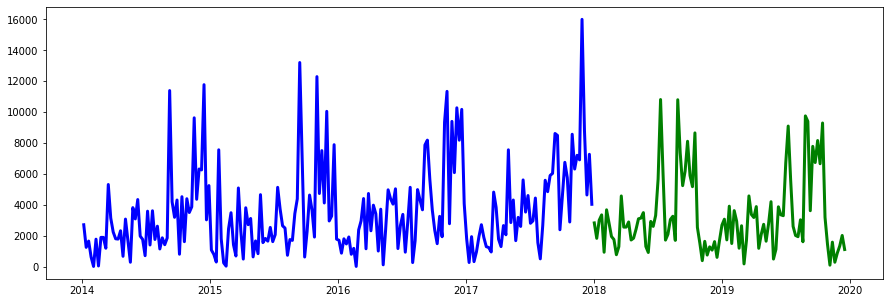

In [553]:
plt.figure(figsize=(15,5))
plt.plot(Orig_Fur,lw=3,color='blue')
#plt.plot(W_test_F,lw=3,color='red')
plt.plot(Fur_weekly_Fore,lw=3,color='green')

### Try

In [265]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [204]:
parameters = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(W_train_F,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
        aic = results.aic
        parameters.append([param,param_seasonal,aic])
        
result_table = pd.DataFrame(parameters)
result_table.columns = ['parameters','parameters_seasonal','aic']
result_table = result_table.sort_values(by='aic',ascending = True).reset_index(drop = True)
minimum = result_table['aic'].min()
a = result_table.loc[result_table['aic'] == minimum]
print(' The best combination that gives the lowest AIC is:')
print(a)

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3208.213763084633
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2951.5861500898236
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:2718.732618997212
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2945.592409617523
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2662.28635428306
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:2448.606417291728
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:2861.5911730227162
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:2516.4206589967007
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:2234.566234295775
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2935.460853795874
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2883.036607317122
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:2663.6985644286046
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2709.932253745739
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2663.5980257470546
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:2428.8491577495406
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:2579.847363288406
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:2491.54945871207
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:2264.2073100022567
ARIMA

ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:2581.8945019042108
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:2356.065512499471
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:2576.908187256541
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:2410.3033269280845
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:2154.855885777115
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:2624.666125303812
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:2626.309684477661
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:2568.063159707456
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:2440.644613019034
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:2410.7360033287696
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:2357.5001970670533
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:2328.2164590164275
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:2232.6059269951643
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:2156.2778811256885
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:3248.8862604907804
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:3017.87101434312
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:2782.7965149883166
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:3128.9351830239893
A

ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:2222.164466875907
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:3016.825776386187
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:2803.698732914608
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:2590.0400652028043
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:2898.5648864102996
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:2595.0740258404458
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:2390.3564214581925
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:2819.3451303611155
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:2459.5661956626363
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:2180.9628083049965
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:2839.0852104215373
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:2805.4970184712283
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:2591.875292784528
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:2680.267783952824
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:2596.595803823525
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:2371.3603439332123
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:2566.4007453441973
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:2435.984978226056

ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:2681.0683410532897
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:2643.8372260457695
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:2370.777418929563
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:2569.493271756886
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:2527.6539760077562
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:2170.1290032011366
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:2612.1098087204186
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:2613.542384767147
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:2597.1359161807254
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:2443.8270932515547
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:2432.441916736436
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:2414.853766214896
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:2316.0851092305143
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:2204.726310173893
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:2284.724226806583
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:2999.7742211588575
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:2783.436023784922
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:2566.1110372307794


ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:2198.1635607065386
ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:2270.5989531650407
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:3009.9074678674506
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:2796.8958270182443
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:2582.426237286807
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:2903.735805036311
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:2593.055914193129
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:2369.3073564153906
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:2823.117414229517
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:2512.658557461052
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:2168.170255123882
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:2796.940623754217
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:2798.763389923007
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:2584.4255705568053
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:2647.802959313876
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:2594.006290230608
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:2395.2876164189793
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:2533.3207090359197
AR

In [219]:
mod = sm.tsa.statespace.SARIMAX(W_train_F,
                                order=(1, 1, 2),
                                seasonal_order=(0, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  165
Model:             SARIMAX(1, 1, 2)x(0, 2, 2, 12)   Log Likelihood               -1069.678
Date:                            Mon, 09 May 2022   AIC                           2151.356
Time:                                    23:17:19   BIC                           2167.721
Sample:                                01-06-2014   HQIC                          2157.997
                                     - 02-27-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7586      0.150      5.048      0.000       0.464       1.053
ma.L1         -1.4446      0.320   

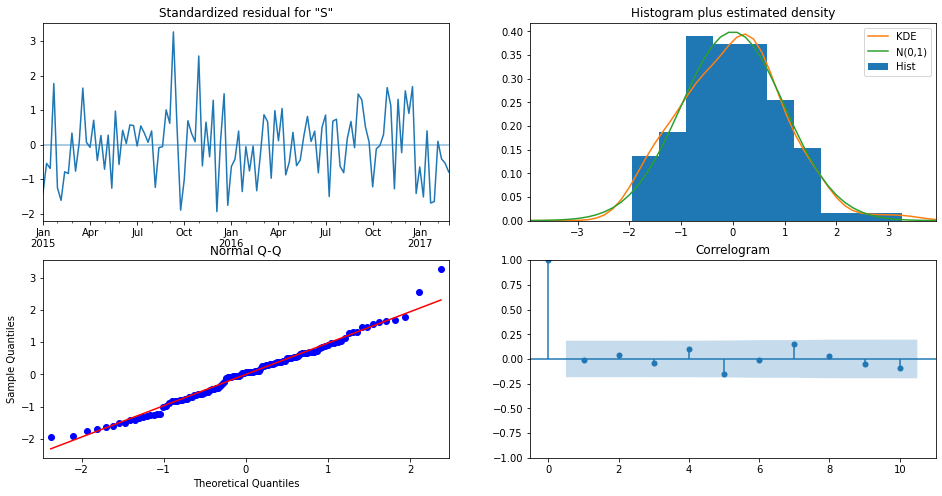

In [220]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [221]:
w_pred = results.predict(start=165,end=207,dynamic=True)
w_pred

2017-03-06    1515.984911
2017-03-13    1699.087754
2017-03-20    2005.419392
2017-03-27     -38.470362
2017-04-03    1990.085508
2017-04-10     -27.334431
2017-04-17    3698.020542
2017-04-24    6086.743803
2017-05-01    3511.131470
2017-05-08    5387.476983
2017-05-15    4522.874591
2017-05-22    5161.727342
2017-05-29    3513.618496
2017-06-05    3670.054000
2017-06-12    2348.006062
2017-06-19     200.183120
2017-06-26    2164.169574
2017-07-03      -5.168208
2017-07-10    3751.067925
2017-07-17    6325.554197
2017-07-24    3673.196001
2017-07-31    5835.407606
2017-08-07    4554.400360
2017-08-14    5553.510558
2017-08-21    3814.495056
2017-08-28    4349.145435
2017-09-04    1705.849117
2017-09-11    -312.926735
2017-09-18    1763.221980
2017-09-25    -423.970430
2017-10-02    3464.843094
2017-10-09    6302.236010
2017-10-16    3631.650740
2017-10-23    6124.118991
2017-10-30    4460.380199
2017-11-06    5845.291380
2017-11-13    4034.745763
2017-11-20    4962.309464
2017-11-27  

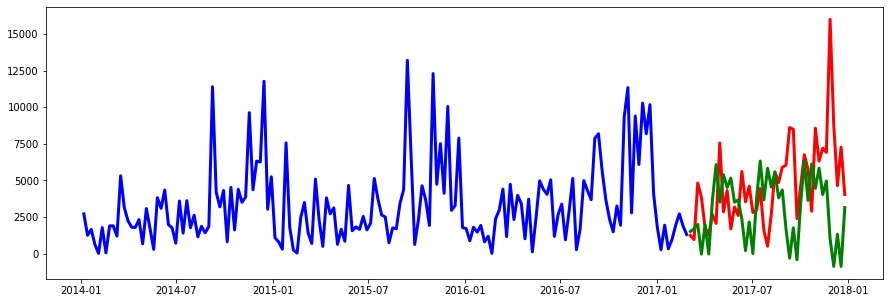

In [222]:
plt.figure(figsize=(15,5))
plt.plot(W_train_F,lw=3,color='blue')
plt.plot(W_test_F,lw=3,color='red')
plt.plot(w_pred,lw=3,color='green')

In [ ]:
W_test_F['W_Fur_predict'] = W_Fur_Pred
r2_score(W_test_F['Sales'],W_test_F['W_Fur_predict'])

In [215]:
r2_score(W_test_F,w_pred)

-1.1306173185901063

In [216]:
mse_2 = mean_squared_error(W_test_F,w_pred)

In [217]:
print(mse_2)

17550734.13751283


In [251]:
mod_1 = sm.tsa.statespace.SARIMAX(W_train_F,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_1 = mod_1.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  165
Model:             SARIMAX(1, 1, 2)x(0, 2, 2, 12)   Log Likelihood               -1069.678
Date:                            Mon, 09 May 2022   AIC                           2151.356
Time:                                    23:22:53   BIC                           2167.721
Sample:                                01-06-2014   HQIC                          2157.997
                                     - 02-27-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7586      0.150      5.048      0.000       0.464       1.053
ma.L1         -1.4446      0.320   

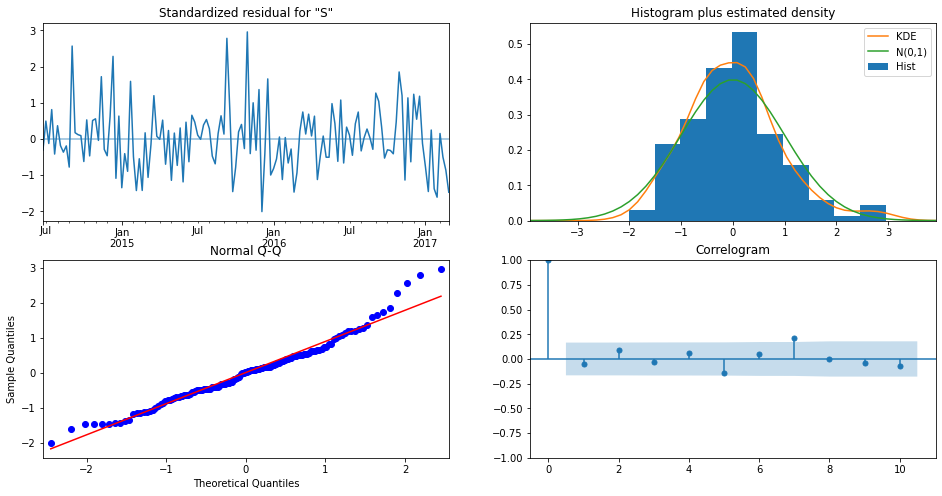

In [252]:
results_1.plot_diagnostics(figsize=(16, 8))
plt.show()

In [253]:
w_pred1 = results_1.predict(start=165,end=207,dynamic=True)
w_pred1

2017-03-06    3538.807048
2017-03-13    3891.131227
2017-03-20     749.095577
2017-03-27    -426.303386
2017-04-03      98.775658
2017-04-10     429.592499
2017-04-17    3853.321938
2017-04-24    5398.936872
2017-05-01    1442.870959
2017-05-08    5476.274378
2017-05-15    3438.133025
2017-05-22    5499.820661
2017-05-29    5512.598766
2017-06-05    6814.507251
2017-06-12    2155.150827
2017-06-19     447.905322
2017-06-26     -81.556594
2017-07-03    1004.617021
2017-07-10    1772.368763
2017-07-17    2861.556575
2017-07-24    1563.000096
2017-07-31    3878.764201
2017-08-07    2505.858436
2017-08-14    3165.528706
2017-08-21    4381.310640
2017-08-28    5187.714487
2017-09-04    1347.733983
2017-09-11     -67.442107
2017-09-18     -27.079901
2017-09-25     662.016315
2017-10-02    2852.337070
2017-10-09    4189.520315
2017-10-16    1476.515460
2017-10-23    4712.159363
2017-10-30    2987.004197
2017-11-06    4397.250971
2017-11-13    4973.053109
2017-11-20    6045.623233
2017-11-27  

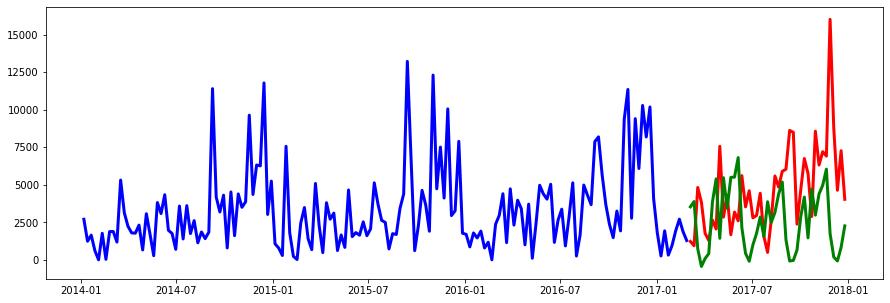

In [254]:
plt.figure(figsize=(15,5))
plt.plot(W_train_F,lw=3,color='blue')
plt.plot(W_test_F,lw=3,color='red')
plt.plot(w_pred1,lw=3,color='green')